In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb

In [ ]:
# import data_analysis_function

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [ ]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [1]:
import json
import collections
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataset_analysis import create_dataframe
from dataset_analysis import conversion_timestamp_to_unixtime
from dataset_analysis import remove_rw_column
from dataset_analysis import alter_time
from dataset_analysis import rearrange_frame
from dataset_analysis import drop_zero_value_row_of_blast_furnace_signal
from dataset_analysis import drop_zero_value_row_of_target_signal
from dataset_analysis import drop_column_with_same_value
from dataset_analysis import drop_nan_value
from dataset_analysis import drop_row
from dataset_analysis import drop_string_column
from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import dataframe_date_time_type
from dataset_analysis import my_sum
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

In [2]:
from model_file import make_dataset
from model_file import scikit_learn_model
from model_file import plot_graph
from model_file import evaluation_metrices

In [3]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_server = config['DEFAULT']['file_path_server']
start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
print(type(correlation_threshold_min_value))
print(furnace_signal_column_a)

<class 'float'>
DEWIHOAT9_I0


In [4]:
initial_dataframe = create_dataframe(filepath_server)

In [ ]:
initial_dataframe.head()

In [ ]:
u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
print(u,v,w,x)

# plotted blast furnace A and B for Turbine 8's output

In [ ]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

In [ ]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'black')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
test_new = conversion_timestamp_to_unixtime(initial_dataframe)

/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/dataset_analysis.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  longTime = longTime.as_matrix()


In [ ]:
test_new.tail()

In [ ]:
# test_new_alter = test_new.loc[::-1]
# print(test_new_alter.shape)
# test_new_alter.head()

In [ ]:
# plt.plot(test_new_alter[target_column], color = 'blue')
# plt.plot(test_new_alter[furnace_signal_column], color = 'red')
# plt.legend([target_column, furnace_signal_column], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
test_new.shape

In [6]:
# test_new_1 = test_new.drop(['row ID'], axis = 1)

test_new_1 = test_new

var_new = remove_rw_column(test_new_1)

test_new_2 = test_new_1.iloc[:][var_new]

# Taking define number of row from the beginning
multivariate_data = alter_time(test_new_2, start_pos, test_new.shape[0])

In [ ]:
multivariate_data.shape

In [ ]:
multivariate_data.head()

In [ ]:
multivariate_data.tail()

In [7]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [9]:
rearranged_dataframe.tail()

,dateTime,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAWF_V0,AEWIHOAKVSV0,AEWIHO_T9AV2
4,2019-08-15 09:06:00,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.629849,63.149452,42.009703,57.167141,70.572657,72.358673,25.090725,0,4.817258,75.514649
3,2019-08-15 09:07:00,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.592478,62.868783,42.389817,57.236065,70.572657,72.472953,24.828106,0,4.822540,75.608264
2,2019-08-15 09:08:00,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,11.549719,...,95.592478,62.868783,41.909339,57.061893,70.572657,72.587232,24.741152,0,4.821300,75.169542
1,2019-08-15 09:09:00,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,...,95.564453,62.731216,41.866866,56.661886,70.572657,72.587232,24.685315,0,4.821300,74.837410
0,2019-08-15 09:10:00,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,11.549719,...,95.517746,62.243573,42.216130,57.188928,70.572657,72.587232,24.318297,0,4.826622,74.720623


In [ ]:
# count =0
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
#     if v>=98 or rearranged_dataframe.iloc[i][furnace_signal_column_b]>99:
#         count +=1
        
# print(count)

In [ ]:
# for x,r in enumerate(rearranged_dataframe[furnace_signal_column_b]):
#     if r!=100:
#         print(x,'\t',r)

In [ ]:
# increase=0
# count_array_1 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
#     if v<98 and rearranged_dataframe.iloc[i][furnace_signal_column_b]<100:
#         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_1 = np.append(count_array_1, i)
#         increase+=1

In [10]:
increase_1=0
count_array_2 = []
for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    if rearranged_dataframe.iloc[i][furnace_signal_column_a] ==0 and rearranged_dataframe.iloc[i][furnace_signal_column_b]==0:
#         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
        count_array_2 = np.append(count_array_2, i)
        increase_1+=1

In [11]:
print(increase_1)
print(count_array_2.shape)

44606
(44606,)


In [24]:
count_3=0
count_array_3 = []
for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    if v != 98.36065573770493 and rearranged_dataframe.iloc[i][furnace_signal_column_b] != 100:
#         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
        count_array_3 = np.append(count_array_3, i)
        count_3+=1

In [27]:
count_3
count_array_3.shape

(44645,)

In [29]:
if count_array_3.size > 0:
    dataframe_4 = rearranged_dataframe.drop(count_array_3, axis=0)  # axis= 0 means row indiated. 1 means column indicated
else:
    dataframe_4 = rearranged_dataframe

In [33]:
for i,j in enumerate(dataframe_4[furnace_signal_column_a]):
    if j == 0 and dataframe_4.iloc[i][furnace_signal_column_b]==0:
        print('problem: i',i,'\t j: ',j,'\t blast furnace B: ',dataframe_4.iloc[i][furnace_signal_column_b])

problem: i 8105 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8106 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8107 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8108 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8109 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8110 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8111 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8112 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8113 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8114 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8115 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8116 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8117 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8118 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8119 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8120 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8121 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8122 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8123 	 j:  0.0 	 blast furnace B:  0.0
problem: i 8124 	 j:  0.0 	 blast furnace B:  0.0


problem: i 27227 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27228 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27229 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27230 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27231 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27232 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27233 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27234 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27235 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27236 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27237 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27238 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27239 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27240 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27241 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27242 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27243 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27244 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27245 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27246 	 j:  0.0 	 bl

problem: i 27399 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27400 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27401 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27402 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27403 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27404 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27405 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27406 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27407 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27408 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27409 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27410 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27411 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27412 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27413 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27414 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27415 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27416 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27417 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27418 	 j:  0.0 	 bl

problem: i 27567 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27568 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27569 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27570 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27571 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27572 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27573 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27574 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27575 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27576 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27577 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27578 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27579 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27580 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27581 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27582 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27583 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27584 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27585 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27586 	 j:  0.0 	 bl

problem: i 27735 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27736 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27737 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27738 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27739 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27740 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27741 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27742 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27743 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27744 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27745 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27746 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27747 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27748 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27749 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27750 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27751 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27752 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27753 	 j:  0.0 	 blast furnace B:  0.0
problem: i 27754 	 j:  0.0 	 bl

problem: i 29793 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29794 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29795 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29796 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29797 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29798 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29799 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29800 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29801 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29802 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29803 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29804 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29805 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29806 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29807 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29808 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29809 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29810 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29811 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29812 	 j:  0.0 	 bl

problem: i 29978 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29979 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29980 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29981 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29982 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29983 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29984 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29985 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29986 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29987 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29988 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29989 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29990 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29991 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29992 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29993 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29994 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29995 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29996 	 j:  0.0 	 blast furnace B:  0.0
problem: i 29997 	 j:  0.0 	 bl

problem: i 30141 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30142 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30143 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30144 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30145 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30146 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30147 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30148 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30149 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30150 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30151 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30152 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30153 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30154 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30155 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30156 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30157 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30158 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30159 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30160 	 j:  0.0 	 bl

problem: i 30404 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30405 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30406 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30407 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30408 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30409 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30410 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30411 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30412 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30413 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30414 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30415 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30416 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30417 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30418 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30419 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30420 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30421 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30422 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30423 	 j:  0.0 	 bl

problem: i 30588 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30589 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30590 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30591 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30592 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30593 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30594 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30595 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30596 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30597 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30598 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30599 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30600 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30601 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30602 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30603 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30604 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30605 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30606 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30607 	 j:  0.0 	 bl

problem: i 30830 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30831 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30832 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30833 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30834 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30835 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30836 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30837 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30838 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30839 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30840 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30841 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30842 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30843 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30844 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30845 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30846 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30847 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30848 	 j:  0.0 	 blast furnace B:  0.0
problem: i 30849 	 j:  0.0 	 bl

problem: i 31023 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31024 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31025 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31026 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31027 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31028 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31029 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31030 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31031 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31032 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31033 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31034 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31035 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31036 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31037 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31038 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31039 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31040 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31041 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31042 	 j:  0.0 	 bl

problem: i 31197 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31198 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31199 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31200 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31201 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31202 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31203 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31204 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31205 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31206 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31207 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31208 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31209 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31210 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31211 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31212 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31213 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31214 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31215 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31216 	 j:  0.0 	 bl

problem: i 31380 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31381 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31382 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31383 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31384 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31385 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31386 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31387 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31388 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31389 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31390 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31391 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31392 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31393 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31394 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31395 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31396 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31397 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31398 	 j:  0.0 	 blast furnace B:  0.0
problem: i 31399 	 j:  0.0 	 bl

problem: i 36397 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36398 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36399 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36400 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36401 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36402 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36403 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36404 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36405 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36406 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36407 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36408 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36409 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36410 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36411 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36412 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36413 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36414 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36415 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36416 	 j:  0.0 	 bl

problem: i 36560 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36561 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36562 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36563 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36564 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36565 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36566 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36567 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36568 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36569 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36570 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36571 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36572 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36573 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36574 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36575 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36576 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36577 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36578 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36579 	 j:  0.0 	 bl

problem: i 36801 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36802 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36803 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36804 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36805 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36806 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36807 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36808 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36809 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36810 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36811 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36812 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36813 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36814 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36815 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36816 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36817 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36818 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36819 	 j:  0.0 	 blast furnace B:  0.0
problem: i 36820 	 j:  0.0 	 bl

problem: i 37074 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37075 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37076 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37077 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37078 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37079 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37080 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37081 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37082 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37083 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37084 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37085 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37086 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37087 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37088 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37089 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37090 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37091 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37092 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37093 	 j:  0.0 	 bl

problem: i 37291 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37292 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37293 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37294 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37295 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37296 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37297 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37298 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37299 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37300 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37301 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37302 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37303 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37304 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37305 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37306 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37307 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37308 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37309 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37310 	 j:  0.0 	 bl

problem: i 37461 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37462 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37463 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37464 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37465 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37466 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37467 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37468 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37469 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37470 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37480 	 j:  0.0 	 bl

problem: i 37740 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37741 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37742 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37743 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37744 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37745 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37746 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37747 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37748 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37749 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37750 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37751 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37752 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37753 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37754 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37755 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37756 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37757 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37758 	 j:  0.0 	 blast furnace B:  0.0
problem: i 37759 	 j:  0.0 	 bl

problem: i 42412 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42413 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42414 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42415 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42416 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42417 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42418 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42419 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42420 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42421 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42422 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42423 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42424 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42425 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42426 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42427 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42428 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42429 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42430 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42431 	 j:  0.0 	 bl

problem: i 42609 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42610 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42611 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42612 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42613 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42614 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42615 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42616 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42617 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42618 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42619 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42620 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42621 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42622 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42623 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42624 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42625 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42626 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42627 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42628 	 j:  0.0 	 bl

problem: i 42808 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42809 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42810 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42811 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42812 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42813 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42814 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42815 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42816 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42817 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42818 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42819 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42820 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42821 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42822 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42823 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42824 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42825 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42826 	 j:  0.0 	 blast furnace B:  0.0
problem: i 42827 	 j:  0.0 	 bl

problem: i 43005 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43006 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43007 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43008 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43009 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43010 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43011 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43012 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43013 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43014 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43015 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43016 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43017 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43018 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43019 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43020 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43021 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43022 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43023 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43024 	 j:  0.0 	 bl

problem: i 43180 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43181 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43182 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43183 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43184 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43185 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43186 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43187 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43188 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43189 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43190 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43191 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43192 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43193 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43194 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43195 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43196 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43197 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43198 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43199 	 j:  0.0 	 bl

problem: i 43350 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43351 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43352 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43353 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43354 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43355 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43356 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43357 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43358 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43359 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43360 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43361 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43362 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43363 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43364 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43365 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43366 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43367 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43368 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43369 	 j:  0.0 	 bl

problem: i 43521 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43522 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43523 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43524 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43525 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43526 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43527 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43528 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43529 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43530 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43531 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43532 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43533 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43534 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43535 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43536 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43537 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43538 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43539 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43540 	 j:  0.0 	 bl

problem: i 43716 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43717 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43718 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43719 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43720 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43721 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43722 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43723 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43724 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43725 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43726 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43727 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43728 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43729 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43730 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43731 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43732 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43733 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43734 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43735 	 j:  0.0 	 bl

problem: i 43885 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43886 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43887 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43888 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43889 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43890 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43891 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43892 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43893 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43894 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43895 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43896 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43897 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43898 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43899 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43900 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43901 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43902 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43903 	 j:  0.0 	 blast furnace B:  0.0
problem: i 43904 	 j:  0.0 	 bl

problem: i 44056 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44057 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44058 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44059 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44060 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44061 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44062 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44063 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44064 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44065 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44066 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44067 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44068 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44069 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44070 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44071 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44072 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44073 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44074 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44075 	 j:  0.0 	 bl

problem: i 44241 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44242 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44243 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44244 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44245 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44246 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44247 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44248 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44249 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44250 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44251 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44252 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44253 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44254 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44255 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44256 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44257 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44258 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44259 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44260 	 j:  0.0 	 bl

problem: i 44422 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44423 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44424 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44425 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44426 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44427 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44428 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44429 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44430 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44431 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44432 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44433 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44434 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44435 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44436 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44437 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44438 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44439 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44440 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44441 	 j:  0.0 	 bl

problem: i 44609 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44610 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44611 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44612 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44613 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44614 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44615 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44616 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44617 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44618 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44619 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44620 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44621 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44622 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44623 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44624 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44625 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44626 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44627 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44628 	 j:  0.0 	 bl

problem: i 44791 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44792 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44793 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44794 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44795 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44796 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44797 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44798 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44799 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44800 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44801 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44802 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44803 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44804 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44805 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44806 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44807 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44808 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44809 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44810 	 j:  0.0 	 bl

problem: i 44995 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44996 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44997 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44998 	 j:  0.0 	 blast furnace B:  0.0
problem: i 44999 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45000 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45001 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45002 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45003 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45004 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45005 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45006 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45007 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45008 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45009 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45010 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45011 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45012 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45013 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45014 	 j:  0.0 	 bl

problem: i 45167 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45168 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45169 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45170 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45171 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45172 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45173 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45174 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45175 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45176 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45177 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45178 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45179 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45180 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45181 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45182 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45183 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45184 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45185 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45186 	 j:  0.0 	 bl

problem: i 45334 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45335 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45336 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45337 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45338 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45339 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45340 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45341 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45342 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45343 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45344 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45345 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45346 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45347 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45348 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45349 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45350 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45351 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45352 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45353 	 j:  0.0 	 bl

problem: i 45511 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45512 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45513 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45514 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45515 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45516 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45517 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45518 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45519 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45520 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45521 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45522 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45523 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45524 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45525 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45526 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45527 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45528 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45529 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45530 	 j:  0.0 	 bl

problem: i 45692 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45693 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45694 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45695 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45696 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45697 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45698 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45699 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45700 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45701 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45702 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45703 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45704 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45705 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45706 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45707 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45708 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45709 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45710 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45711 	 j:  0.0 	 bl

problem: i 45858 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45859 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45860 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45861 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45862 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45863 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45864 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45865 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45866 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45867 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45868 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45869 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45870 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45871 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45872 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45873 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45874 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45875 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45876 	 j:  0.0 	 blast furnace B:  0.0
problem: i 45877 	 j:  0.0 	 bl

problem: i 46689 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46690 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46691 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46692 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46693 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46694 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46695 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46696 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46697 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46698 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46699 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46700 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46701 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46702 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46703 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46704 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46705 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46706 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46707 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46708 	 j:  0.0 	 bl

problem: i 46865 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46866 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46867 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46868 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46869 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46870 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46871 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46872 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46873 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46874 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46875 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46876 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46877 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46878 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46879 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46880 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46881 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46882 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46883 	 j:  0.0 	 blast furnace B:  0.0
problem: i 46884 	 j:  0.0 	 bl

problem: i 47967 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47968 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47969 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47970 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47971 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47972 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47973 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47974 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47975 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47976 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47977 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47978 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47979 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47980 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47981 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47982 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47983 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47984 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47985 	 j:  0.0 	 blast furnace B:  0.0
problem: i 47986 	 j:  0.0 	 bl

problem: i 48140 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48141 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48142 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48143 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48144 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48145 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48146 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48147 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48148 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48149 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48150 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48151 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48152 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48153 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48154 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48155 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48156 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48157 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48158 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48159 	 j:  0.0 	 bl

problem: i 48310 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48311 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48312 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48313 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48314 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48315 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48316 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48317 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48318 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48319 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48320 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48321 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48322 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48323 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48324 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48325 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48326 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48327 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48328 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48329 	 j:  0.0 	 bl

problem: i 48477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48480 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48481 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48482 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48483 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48484 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48485 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48486 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48487 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48488 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48489 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48490 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48491 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48492 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48493 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48494 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48495 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48496 	 j:  0.0 	 bl

problem: i 48729 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48730 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48731 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48732 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48733 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48734 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48735 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48736 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48737 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48738 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48739 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48740 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48741 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48742 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48743 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48744 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48745 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48746 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48747 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48748 	 j:  0.0 	 bl

problem: i 48895 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48896 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48897 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48898 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48899 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48900 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48901 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48902 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48903 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48904 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48905 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48906 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48907 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48908 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48909 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48910 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48911 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48912 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48913 	 j:  0.0 	 blast furnace B:  0.0
problem: i 48914 	 j:  0.0 	 bl

problem: i 49071 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49072 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49073 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49074 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49075 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49076 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49077 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49078 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49079 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49080 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49081 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49082 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49083 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49084 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49085 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49086 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49087 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49088 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49089 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49090 	 j:  0.0 	 bl

problem: i 49251 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49252 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49253 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49254 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49255 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49256 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49257 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49258 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49259 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49260 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49261 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49262 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49263 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49264 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49265 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49266 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49267 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49268 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49269 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49270 	 j:  0.0 	 bl

problem: i 49437 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49438 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49439 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49440 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49441 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49442 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49443 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49444 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49445 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49446 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49447 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49448 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49449 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49450 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49451 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49452 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49453 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49454 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49455 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49456 	 j:  0.0 	 bl

problem: i 49607 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49608 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49609 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49610 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49611 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49612 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49613 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49614 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49615 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49616 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49617 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49618 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49619 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49620 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49621 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49622 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49623 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49624 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49625 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49626 	 j:  0.0 	 bl

problem: i 49786 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49787 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49788 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49789 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49790 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49791 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49792 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49793 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49794 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49795 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49796 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49797 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49798 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49799 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49800 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49801 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49802 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49803 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49804 	 j:  0.0 	 blast furnace B:  0.0
problem: i 49805 	 j:  0.0 	 bl

problem: i 50017 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50018 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50019 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50020 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50021 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50022 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50023 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50024 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50025 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50026 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50027 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50028 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50029 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50030 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50031 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50032 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50033 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50034 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50035 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50036 	 j:  0.0 	 bl

problem: i 50273 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50274 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50275 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50276 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50277 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50278 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50279 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50280 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50281 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50282 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50283 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50284 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50285 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50286 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50287 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50288 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50289 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50290 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50291 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50292 	 j:  0.0 	 bl

problem: i 50459 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50460 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50461 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50462 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50463 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50464 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50465 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50466 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50467 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50468 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50469 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50470 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50478 	 j:  0.0 	 bl

problem: i 50620 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50621 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50622 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50623 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50624 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50625 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50626 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50627 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50628 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50629 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50630 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50631 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50632 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50633 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50634 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50635 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50636 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50637 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50638 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50639 	 j:  0.0 	 bl

problem: i 50809 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50810 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50811 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50812 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50813 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50814 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50815 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50816 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50817 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50818 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50819 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50820 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50821 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50822 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50823 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50824 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50825 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50826 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50827 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50828 	 j:  0.0 	 bl

problem: i 50976 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50977 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50978 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50979 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50980 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50981 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50982 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50983 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50984 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50985 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50986 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50987 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50988 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50989 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50990 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50991 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50992 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50993 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50994 	 j:  0.0 	 blast furnace B:  0.0
problem: i 50995 	 j:  0.0 	 bl

problem: i 51139 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51140 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51141 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51142 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51143 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51144 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51145 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51146 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51147 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51148 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51149 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51150 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51151 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51152 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51153 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51154 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51155 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51156 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51157 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51158 	 j:  0.0 	 bl

problem: i 51308 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51309 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51310 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51311 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51312 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51313 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51314 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51315 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51316 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51317 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51318 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51319 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51320 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51321 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51322 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51323 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51324 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51325 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51326 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51327 	 j:  0.0 	 bl

problem: i 51505 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51506 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51507 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51508 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51509 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51510 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51511 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51512 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51513 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51514 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51515 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51516 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51517 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51518 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51519 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51520 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51521 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51522 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51523 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51524 	 j:  0.0 	 bl

problem: i 51682 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51683 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51684 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51685 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51686 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51687 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51688 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51689 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51690 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51691 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51692 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51693 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51694 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51695 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51696 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51697 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51698 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51699 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51700 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51701 	 j:  0.0 	 bl

problem: i 51848 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51849 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51850 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51851 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51852 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51853 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51854 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51855 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51856 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51857 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51858 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51859 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51860 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51861 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51862 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51863 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51864 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51865 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51866 	 j:  0.0 	 blast furnace B:  0.0
problem: i 51867 	 j:  0.0 	 bl

problem: i 52071 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52072 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52073 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52074 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52075 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52076 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52077 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52078 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52079 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52080 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52081 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52082 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52083 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52084 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52085 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52086 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52087 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52088 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52089 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52090 	 j:  0.0 	 bl

problem: i 52275 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52276 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52277 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52278 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52279 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52280 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52281 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52282 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52283 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52284 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52285 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52286 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52287 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52288 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52289 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52290 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52291 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52292 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52293 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52294 	 j:  0.0 	 bl

problem: i 52467 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52468 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52469 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52470 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52480 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52481 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52482 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52483 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52484 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52485 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52486 	 j:  0.0 	 bl

problem: i 52639 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52640 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52641 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52642 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52643 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52644 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52645 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52646 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52647 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52648 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52649 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52650 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52651 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52652 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52653 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52654 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52655 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52656 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52657 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52658 	 j:  0.0 	 bl

problem: i 52825 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52826 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52827 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52828 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52829 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52830 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52831 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52832 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52833 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52834 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52835 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52836 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52837 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52838 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52839 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52840 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52841 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52842 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52843 	 j:  0.0 	 blast furnace B:  0.0
problem: i 52844 	 j:  0.0 	 bl

problem: i 53008 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53009 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53010 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53011 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53012 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53013 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53014 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53015 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53016 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53017 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53018 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53019 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53020 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53021 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53022 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53023 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53024 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53025 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53026 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53027 	 j:  0.0 	 bl

problem: i 53174 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53175 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53176 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53177 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53178 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53179 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53180 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53181 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53182 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53183 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53184 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53185 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53186 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53187 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53188 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53189 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53190 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53191 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53192 	 j:  0.0 	 blast furnace B:  0.0
problem: i 53193 	 j:  0.0 	 bl

problem: i 55836 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55837 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55838 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55839 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55840 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55841 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55842 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55843 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55844 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55845 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55846 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55847 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55848 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55849 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55850 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55851 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55852 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55853 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55854 	 j:  0.0 	 blast furnace B:  0.0
problem: i 55855 	 j:  0.0 	 bl

problem: i 56039 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56040 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56041 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56042 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56043 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56044 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56045 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56046 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56047 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56048 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56049 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56050 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56051 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56052 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56053 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56054 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56055 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56056 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56057 	 j:  0.0 	 blast furnace B:  0.0
problem: i 56058 	 j:  0.0 	 bl

problem: i 63374 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63375 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63376 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63377 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63378 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63379 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63380 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63381 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63382 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63383 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63384 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63385 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63386 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63387 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63388 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63389 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63390 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63391 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63392 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63393 	 j:  0.0 	 bl

problem: i 63581 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63582 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63583 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63584 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63585 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63586 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63587 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63588 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63589 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63590 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63591 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63592 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63593 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63594 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63595 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63596 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63597 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63598 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63599 	 j:  0.0 	 blast furnace B:  0.0
problem: i 63600 	 j:  0.0 	 bl

problem: i 68718 	 j:  0.0 	 blast furnace B:  0.0
problem: i 68719 	 j:  0.0 	 blast furnace B:  0.0
problem: i 68720 	 j:  0.0 	 blast furnace B:  0.0
problem: i 68721 	 j:  0.0 	 blast furnace B:  0.0
problem: i 68722 	 j:  0.0 	 blast furnace B:  0.0
problem: i 68723 	 j:  0.0 	 blast furnace B:  0.0
problem: i 68724 	 j:  0.0 	 blast furnace B:  0.0
problem: i 68725 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69100 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69101 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69102 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69103 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69104 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69105 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69106 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69107 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69108 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69109 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69110 	 j:  0.0 	 blast furnace B:  0.0
problem: i 69111 	 j:  0.0 	 bl

problem: i 84089 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84090 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84091 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84092 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84093 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84094 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84095 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84096 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84097 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84098 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84099 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84100 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84101 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84102 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84103 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84104 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84105 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84106 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84107 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84108 	 j:  0.0 	 bl

problem: i 84275 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84276 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84277 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84278 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84279 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84280 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84281 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84282 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84283 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84284 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84285 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84286 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84287 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84288 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84289 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84290 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84291 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84292 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84293 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84294 	 j:  0.0 	 bl

problem: i 84464 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84465 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84466 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84467 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84468 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84469 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84470 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84480 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84481 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84482 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84483 	 j:  0.0 	 bl

problem: i 84644 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84645 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84646 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84647 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84648 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84649 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84650 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84651 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84652 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84653 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84654 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84655 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84656 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84657 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84658 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84659 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84660 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84661 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84662 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84663 	 j:  0.0 	 bl

problem: i 84840 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84841 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84842 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84843 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84844 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84845 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84846 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84847 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84848 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84849 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84850 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84851 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84852 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84853 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84854 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84855 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84856 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84857 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84858 	 j:  0.0 	 blast furnace B:  0.0
problem: i 84859 	 j:  0.0 	 bl

problem: i 99024 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99025 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99026 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99027 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99028 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99029 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99030 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99031 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99032 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99033 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99034 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99035 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99036 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99037 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99038 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99039 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99040 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99041 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99042 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99043 	 j:  0.0 	 bl

problem: i 99197 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99198 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99199 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99200 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99201 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99202 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99203 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99204 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99205 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99206 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99207 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99208 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99209 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99210 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99211 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99212 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99213 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99214 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99215 	 j:  0.0 	 blast furnace B:  0.0
problem: i 99216 	 j:  0.0 	 bl

problem: i 101909 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101910 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101911 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101912 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101913 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101914 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101915 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101916 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101917 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101918 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101919 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101920 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101921 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101922 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101923 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101924 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101925 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101926 	 j:  0.0 	 blast furnace B:  0.0
problem: i 101927 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 102090 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102091 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102092 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102093 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102094 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102095 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102096 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102097 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102098 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102099 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102100 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102101 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102102 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102103 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102104 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102105 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102106 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102107 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102108 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 102286 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102287 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102288 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102289 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102290 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102291 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102292 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102293 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102294 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102295 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102296 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102297 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102298 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102299 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102300 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102301 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102302 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102303 	 j:  0.0 	 blast furnace B:  0.0
problem: i 102304 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 103513 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103514 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103515 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103516 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103517 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103518 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103519 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103520 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103521 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103522 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103523 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103524 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103525 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103526 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103527 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103528 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103529 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103530 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103531 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 103726 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103727 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103728 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103729 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103730 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103731 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103732 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103733 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103734 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103735 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103736 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103737 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103738 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103739 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103740 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103741 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103742 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103743 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103744 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 103960 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103961 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103962 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103963 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103964 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103965 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103966 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103967 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103968 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103969 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103970 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103971 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103972 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103973 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103974 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103975 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103976 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103977 	 j:  0.0 	 blast furnace B:  0.0
problem: i 103978 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 104138 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104139 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104140 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104141 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104142 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104143 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104144 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104145 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104146 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104147 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104148 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104149 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104150 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104151 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104152 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104153 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104154 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104155 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104156 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 104311 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104312 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104313 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104314 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104315 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104316 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104317 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104318 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104319 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104320 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104321 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104322 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104323 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104324 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104325 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104326 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104327 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104328 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104329 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 104513 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104514 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104515 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104516 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104517 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104518 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104519 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104520 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104521 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104522 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104523 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104524 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104525 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104526 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104527 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104528 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104529 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104530 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104531 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 104681 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104682 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104683 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104684 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104685 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104686 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104687 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104688 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104689 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104690 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104691 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104692 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104693 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104694 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104695 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104696 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104697 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104698 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104699 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 104843 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104844 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104845 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104846 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104847 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104848 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104849 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104850 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104851 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104852 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104853 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104854 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104855 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104856 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104857 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104858 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104859 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104860 	 j:  0.0 	 blast furnace B:  0.0
problem: i 104861 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 105013 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105014 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105015 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105016 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105017 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105018 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105019 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105020 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105021 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105022 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105023 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105024 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105025 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105026 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105027 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105028 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105029 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105030 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105031 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 105216 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105217 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105218 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105219 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105220 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105221 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105222 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105223 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105224 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105225 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105226 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105227 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105228 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105229 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105230 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105231 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105232 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105233 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105234 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 105410 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105411 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105412 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105413 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105414 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105415 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105416 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105417 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105418 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105419 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105420 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105421 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105422 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105423 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105424 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105425 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105426 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105427 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105428 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 105574 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105575 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105576 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105577 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105578 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105579 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105580 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105581 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105582 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105583 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105584 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105585 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105586 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105587 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105588 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105589 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105590 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105591 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105592 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 105765 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105766 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105767 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105768 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105769 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105770 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105771 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105772 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105773 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105774 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105775 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105776 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105777 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105778 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105779 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105780 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105781 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105782 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105783 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 105940 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105941 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105942 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105943 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105944 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105945 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105946 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105947 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105948 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105949 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105950 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105951 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105952 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105953 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105954 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105955 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105956 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105957 	 j:  0.0 	 blast furnace B:  0.0
problem: i 105958 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 106145 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106146 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106147 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106148 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106149 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106150 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106151 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106152 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106153 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106154 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106155 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106156 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106157 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106158 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106159 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106160 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106161 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106162 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106163 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 106385 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106386 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106387 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106388 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106389 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106390 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106391 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106392 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106393 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106394 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106395 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106396 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106397 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106398 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106399 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106400 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106401 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106402 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106403 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 106553 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106554 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106555 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106556 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106557 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106558 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106559 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106560 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106561 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106562 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106563 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106564 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106565 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106566 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106567 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106568 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106569 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106570 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106571 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 106740 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106741 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106742 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106743 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106744 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106745 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106746 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106747 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106748 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106749 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106750 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106751 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106752 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106753 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106754 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106755 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106756 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106757 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106758 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 106929 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106930 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106931 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106932 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106933 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106934 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106935 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106936 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106937 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106938 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106939 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106940 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106941 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106942 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106943 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106944 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106945 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106946 	 j:  0.0 	 blast furnace B:  0.0
problem: i 106947 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 107089 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107090 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107091 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107092 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107093 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107094 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107095 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107096 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107097 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107098 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107099 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107100 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107101 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107102 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107103 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107104 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107105 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107106 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107107 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 107290 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107291 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107292 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107293 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107294 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107295 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107296 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107297 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107298 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107299 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107300 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107301 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107302 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107303 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107304 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107305 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107306 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107307 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107308 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 107523 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107524 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107525 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107526 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107527 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107528 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107529 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107530 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107531 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107532 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107533 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107534 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107535 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107536 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107537 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107538 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107539 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107540 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107541 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 107710 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107711 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107712 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107713 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107714 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107715 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107716 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107717 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107718 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107719 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107720 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107721 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107722 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107723 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107724 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107725 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107726 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107727 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107728 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 107903 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107904 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107905 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107906 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107907 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107908 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107909 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107910 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107911 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107912 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107913 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107914 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107915 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107916 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107917 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107918 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107919 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107920 	 j:  0.0 	 blast furnace B:  0.0
problem: i 107921 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 108084 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108085 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108086 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108087 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108088 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108089 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108090 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108091 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108092 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108093 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108094 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108095 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108096 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108097 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108098 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108099 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108100 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108101 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108102 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 108270 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108271 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108272 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108273 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108274 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108275 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108276 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108277 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108278 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108279 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108280 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108281 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108282 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108283 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108284 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108285 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108286 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108287 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108288 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 108445 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108446 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108447 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108448 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108449 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108450 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108451 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108452 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108453 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108454 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108455 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108456 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108457 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108458 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108459 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108460 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108461 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108462 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108463 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 108624 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108625 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108626 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108627 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108628 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108629 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108630 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108631 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108632 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108633 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108634 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108635 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108636 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108637 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108638 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108639 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108640 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108641 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108642 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 108792 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108793 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108794 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108795 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108796 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108797 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108798 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108799 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108800 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108801 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108802 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108803 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108804 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108805 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108806 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108807 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108808 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108809 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108810 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 108959 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108960 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108961 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108962 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108963 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108964 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108965 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108966 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108967 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108968 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108969 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108970 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108971 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108972 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108973 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108974 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108975 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108976 	 j:  0.0 	 blast furnace B:  0.0
problem: i 108977 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 109117 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109118 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109119 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109120 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109121 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109122 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109123 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109124 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109125 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109126 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109127 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109128 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109129 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109130 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109131 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109132 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109133 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109134 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109135 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 109305 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109306 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109307 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109308 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109309 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109310 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109311 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109312 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109313 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109314 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109315 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109316 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109317 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109318 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109319 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109320 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109321 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109322 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109323 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 109491 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109492 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109493 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109494 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109495 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109496 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109497 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109498 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109499 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109500 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109501 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109502 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109503 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109504 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109505 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109506 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109507 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109508 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109509 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 109664 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109665 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109666 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109667 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109668 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109669 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109670 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109671 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109672 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109673 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109674 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109675 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109676 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109677 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109678 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109679 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109680 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109681 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109682 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 109853 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109854 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109855 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109856 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109857 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109858 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109859 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109860 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109861 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109862 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109863 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109864 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109865 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109866 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109867 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109868 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109869 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109870 	 j:  0.0 	 blast furnace B:  0.0
problem: i 109871 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 110089 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110090 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110091 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110092 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110093 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110094 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110095 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110096 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110097 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110098 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110099 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110100 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110101 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110102 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110103 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110104 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110105 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110106 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110107 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 110251 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110252 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110253 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110254 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110255 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110256 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110257 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110258 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110259 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110260 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110261 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110262 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110263 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110264 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110265 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110266 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110267 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110268 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110269 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 110462 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110463 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110464 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110465 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110466 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110467 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110468 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110469 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110470 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110480 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 110646 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110647 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110648 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110649 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110650 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110651 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110652 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110653 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110654 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110655 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110656 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110657 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110658 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110659 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110660 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110661 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110662 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110663 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110664 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 110808 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110809 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110810 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110811 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110812 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110813 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110814 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110815 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110816 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110817 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110818 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110819 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110820 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110821 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110822 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110823 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110824 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110825 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110826 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 110974 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110975 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110976 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110977 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110978 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110979 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110980 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110981 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110982 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110983 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110984 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110985 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110986 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110987 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110988 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110989 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110990 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110991 	 j:  0.0 	 blast furnace B:  0.0
problem: i 110992 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 111179 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111180 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111181 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111182 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111183 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111184 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111185 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111186 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111187 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111188 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111189 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111190 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111191 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111192 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111193 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111194 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111195 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111196 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111197 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 111382 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111383 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111384 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111385 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111386 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111387 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111388 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111389 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111390 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111391 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111392 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111393 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111394 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111395 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111396 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111397 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111398 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111399 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111400 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 111555 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111556 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111557 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111558 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111559 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111560 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111561 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111562 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111563 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111564 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111565 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111566 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111567 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111568 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111569 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111570 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111571 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111572 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111573 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 111775 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111776 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111777 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111778 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111779 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111780 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111781 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111782 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111783 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111784 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111785 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111786 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111787 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111788 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111789 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111790 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111791 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111792 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111793 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 111943 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111944 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111945 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111946 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111947 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111948 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111949 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111950 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111951 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111952 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111953 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111954 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111955 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111956 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111957 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111958 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111959 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111960 	 j:  0.0 	 blast furnace B:  0.0
problem: i 111961 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 112107 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112108 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112109 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112110 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112111 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112112 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112113 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112114 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112115 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112116 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112117 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112118 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112119 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112120 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112121 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112122 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112123 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112124 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112125 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 112337 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112338 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112339 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112340 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112341 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112342 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112343 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112344 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112345 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112346 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112347 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112348 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112349 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112350 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112351 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112352 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112353 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112354 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112355 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 112518 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112519 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112520 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112521 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112522 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112523 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112524 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112525 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112526 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112527 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112528 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112529 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112530 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112531 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112532 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112533 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112534 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112535 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112536 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 112681 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112682 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112683 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112684 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112685 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112686 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112687 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112688 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112689 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112690 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112691 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112692 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112693 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112694 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112695 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112696 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112697 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112698 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112699 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 112895 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112896 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112897 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112898 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112899 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112900 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112901 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112902 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112903 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112904 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112905 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112906 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112907 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112908 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112909 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112910 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112911 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112912 	 j:  0.0 	 blast furnace B:  0.0
problem: i 112913 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 113059 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113060 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113061 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113062 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113063 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113064 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113065 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113066 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113067 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113068 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113069 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113070 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113071 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113072 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113073 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113074 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113075 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113076 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113077 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 113253 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113254 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113255 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113256 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113257 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113258 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113259 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113260 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113261 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113262 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113263 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113264 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113265 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113266 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113267 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113268 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113269 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113270 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113271 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 113457 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113458 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113459 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113460 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113461 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113462 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113463 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113464 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113465 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113466 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113467 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113468 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113469 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113470 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 113628 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113629 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113630 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113631 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113632 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113633 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113634 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113635 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113636 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113637 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113638 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113639 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113640 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113641 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113642 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113643 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113644 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113645 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113646 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 113813 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113814 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113815 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113816 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113817 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113818 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113819 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113820 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113821 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113822 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113823 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113824 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113825 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113826 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113827 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113828 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113829 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113830 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113831 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 113991 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113992 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113993 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113994 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113995 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113996 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113997 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113998 	 j:  0.0 	 blast furnace B:  0.0
problem: i 113999 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114000 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114001 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114002 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114003 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114004 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114005 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114006 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114007 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114008 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114009 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 114206 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114207 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114208 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114209 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114210 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114211 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114212 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114213 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114214 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114215 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114216 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114217 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114218 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114219 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114220 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114221 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114222 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114223 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114224 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 114366 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114367 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114368 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114369 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114370 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114371 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114372 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114373 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114374 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114375 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114376 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114377 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114378 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114379 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114380 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114381 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114382 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114383 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114384 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 114547 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114548 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114549 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114550 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114551 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114552 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114553 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114554 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114555 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114556 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114557 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114558 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114559 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114560 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114561 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114562 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114563 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114564 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114565 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 114758 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114759 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114760 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114761 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114762 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114763 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114764 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114765 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114766 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114767 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114768 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114769 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114770 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114771 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114772 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114773 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114774 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114775 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114776 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 114947 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114948 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114949 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114950 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114951 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114952 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114953 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114954 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114955 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114956 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114957 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114958 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114959 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114960 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114961 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114962 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114963 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114964 	 j:  0.0 	 blast furnace B:  0.0
problem: i 114965 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 115113 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115114 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115115 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115116 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115117 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115118 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115119 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115120 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115121 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115122 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115123 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115124 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115125 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115126 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115127 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115128 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115129 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115130 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115131 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 115295 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115296 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115297 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115298 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115299 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115300 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115301 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115302 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115303 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115304 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115305 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115306 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115307 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115308 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115309 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115310 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115311 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115312 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115313 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 115471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115480 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115481 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115482 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115483 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115484 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115485 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115486 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115487 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115488 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115489 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 115658 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115659 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115660 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115661 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115662 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115663 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115664 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115665 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115666 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115667 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115668 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115669 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115670 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115671 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115672 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115673 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115674 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115675 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115676 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 115844 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115845 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115846 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115847 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115848 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115849 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115850 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115851 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115852 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115853 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115854 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115855 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115856 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115857 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115858 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115859 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115860 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115861 	 j:  0.0 	 blast furnace B:  0.0
problem: i 115862 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 116079 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116080 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116081 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116082 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116083 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116084 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116085 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116086 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116087 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116088 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116089 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116090 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116091 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116092 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116093 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116094 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116095 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116096 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116097 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 116256 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116257 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116258 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116259 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116260 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116261 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116262 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116263 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116264 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116265 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116266 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116267 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116268 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116269 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116270 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116271 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116272 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116273 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116274 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 116416 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116417 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116418 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116419 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116420 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116421 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116422 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116423 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116424 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116425 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116426 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116427 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116428 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116429 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116430 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116431 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116432 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116433 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116434 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 116609 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116610 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116611 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116612 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116613 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116614 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116615 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116616 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116617 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116618 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116619 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116620 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116621 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116622 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116623 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116624 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116625 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116626 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116627 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 116829 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116830 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116831 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116832 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116833 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116834 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116835 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116836 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116837 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116838 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116839 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116840 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116841 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116842 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116843 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116844 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116845 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116846 	 j:  0.0 	 blast furnace B:  0.0
problem: i 116847 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 117012 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117013 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117014 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117015 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117016 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117017 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117018 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117019 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117020 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117021 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117022 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117023 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117024 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117025 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117026 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117027 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117028 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117029 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117030 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 117205 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117206 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117207 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117208 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117209 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117210 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117211 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117212 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117213 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117214 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117215 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117216 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117217 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117218 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117219 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117220 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117221 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117222 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117223 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 117374 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117375 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117376 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117377 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117378 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117379 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117380 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117381 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117382 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117383 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117384 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117385 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117386 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117387 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117388 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117389 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117390 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117391 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117392 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 117559 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117560 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117561 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117562 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117563 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117564 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117565 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117566 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117567 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117568 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117569 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117570 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117571 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117572 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117573 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117574 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117575 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117576 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117577 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 117733 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117734 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117735 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117736 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117737 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117738 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117739 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117740 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117741 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117742 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117743 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117744 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117745 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117746 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117747 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117748 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117749 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117750 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117751 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 117910 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117911 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117912 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117913 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117914 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117915 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117916 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117917 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117918 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117919 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117920 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117921 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117922 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117923 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117924 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117925 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117926 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117927 	 j:  0.0 	 blast furnace B:  0.0
problem: i 117928 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 118084 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118085 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118086 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118087 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118088 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118089 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118090 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118091 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118092 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118093 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118094 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118095 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118096 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118097 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118098 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118099 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118100 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118101 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118102 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 118273 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118274 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118275 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118276 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118277 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118278 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118279 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118280 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118281 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118282 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118283 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118284 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118285 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118286 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118287 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118288 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118289 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118290 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118291 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 118465 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118466 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118467 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118468 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118469 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118470 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118480 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118481 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118482 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118483 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 118638 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118639 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118640 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118641 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118642 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118643 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118644 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118645 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118646 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118647 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118648 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118649 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118650 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118651 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118652 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118653 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118654 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118655 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118656 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 118805 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118806 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118807 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118808 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118809 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118810 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118811 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118812 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118813 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118814 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118815 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118816 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118817 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118818 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118819 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118820 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118821 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118822 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118823 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 118981 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118982 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118983 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118984 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118985 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118986 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118987 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118988 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118989 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118990 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118991 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118992 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118993 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118994 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118995 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118996 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118997 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118998 	 j:  0.0 	 blast furnace B:  0.0
problem: i 118999 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 119167 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119168 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119169 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119170 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119171 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119172 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119173 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119174 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119175 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119176 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119177 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119178 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119179 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119180 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119181 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119182 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119183 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119184 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119185 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 119340 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119341 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119342 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119343 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119344 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119345 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119346 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119347 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119348 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119349 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119350 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119351 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119352 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119353 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119354 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119355 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119356 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119357 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119358 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 119517 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119518 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119519 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119520 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119521 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119522 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119523 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119524 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119525 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119526 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119527 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119528 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119529 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119530 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119531 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119532 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119533 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119534 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119535 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 119695 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119696 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119697 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119698 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119699 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119700 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119701 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119702 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119703 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119704 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119705 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119706 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119707 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119708 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119709 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119710 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119711 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119712 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119713 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 119859 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119860 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119861 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119862 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119863 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119864 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119865 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119866 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119867 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119868 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119869 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119870 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119871 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119872 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119873 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119874 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119875 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119876 	 j:  0.0 	 blast furnace B:  0.0
problem: i 119877 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 120126 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120127 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120128 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120129 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120130 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120131 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120132 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120133 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120134 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120135 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120136 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120137 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120138 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120139 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120140 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120141 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120142 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120143 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120144 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 120321 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120322 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120323 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120324 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120325 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120326 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120327 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120328 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120329 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120330 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120331 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120332 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120333 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120334 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120335 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120336 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120337 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120338 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120339 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 120529 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120530 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120531 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120532 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120533 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120534 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120535 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120536 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120537 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120538 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120539 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120540 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120541 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120542 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120543 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120544 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120545 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120546 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120547 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 120716 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120717 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120718 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120719 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120720 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120721 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120722 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120723 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120724 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120725 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120726 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120727 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120728 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120729 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120730 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120731 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120732 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120733 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120734 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 120878 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120879 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120880 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120881 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120882 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120883 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120884 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120885 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120886 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120887 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120888 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120889 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120890 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120891 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120892 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120893 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120894 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120895 	 j:  0.0 	 blast furnace B:  0.0
problem: i 120896 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 121037 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121038 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121039 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121040 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121041 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121042 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121043 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121044 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121045 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121046 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121047 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121048 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121049 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121050 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121051 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121052 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121053 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121054 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121055 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 121199 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121200 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121201 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121202 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121203 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121204 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121205 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121206 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121207 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121208 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121209 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121210 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121211 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121212 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121213 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121214 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121215 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121216 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121217 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 121388 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121389 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121390 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121391 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121392 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121393 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121394 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121395 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121396 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121397 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121398 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121399 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121400 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121401 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121402 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121403 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121404 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121405 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121406 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 121566 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121567 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121568 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121569 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121570 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121571 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121572 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121573 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121574 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121575 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121576 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121577 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121578 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121579 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121580 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121581 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121582 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121583 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121584 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 121741 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121742 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121743 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121744 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121745 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121746 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121747 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121748 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121749 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121750 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121751 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121752 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121753 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121754 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121755 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121756 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121757 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121758 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121759 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 121903 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121904 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121905 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121906 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121907 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121908 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121909 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121910 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121911 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121912 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121913 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121914 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121915 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121916 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121917 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121918 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121919 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121920 	 j:  0.0 	 blast furnace B:  0.0
problem: i 121921 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 122110 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122111 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122112 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122113 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122114 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122115 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122116 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122117 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122118 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122119 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122120 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122121 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122122 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122123 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122124 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122125 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122126 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122127 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122128 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 122280 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122281 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122282 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122283 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122284 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122285 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122286 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122287 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122288 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122289 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122290 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122291 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122292 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122293 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122294 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122295 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122296 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122297 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122298 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 122469 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122470 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122480 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122481 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122482 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122483 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122484 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122485 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122486 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122487 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 122661 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122662 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122663 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122664 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122665 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122666 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122667 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122668 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122669 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122670 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122671 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122672 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122673 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122674 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122675 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122676 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122677 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122678 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122679 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 122866 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122867 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122868 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122869 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122870 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122871 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122872 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122873 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122874 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122875 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122876 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122877 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122878 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122879 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122880 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122881 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122882 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122883 	 j:  0.0 	 blast furnace B:  0.0
problem: i 122884 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 123034 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123035 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123036 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123037 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123038 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123039 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123040 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123041 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123042 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123043 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123044 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123045 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123046 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123047 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123048 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123049 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123050 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123051 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123052 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 123195 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123196 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123197 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123198 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123199 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123200 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123201 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123202 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123203 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123204 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123205 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123206 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123207 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123208 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123209 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123210 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123211 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123212 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123213 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 123471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123480 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123481 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123482 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123483 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123484 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123485 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123486 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123487 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123488 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123489 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 123656 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123657 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123658 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123659 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123660 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123661 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123662 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123663 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123664 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123665 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123666 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123667 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123668 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123669 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123670 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123671 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123672 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123673 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123674 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 123858 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123859 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123860 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123861 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123862 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123863 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123864 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123865 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123866 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123867 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123868 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123869 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123870 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123871 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123872 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123873 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123874 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123875 	 j:  0.0 	 blast furnace B:  0.0
problem: i 123876 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 124024 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124025 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124026 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124027 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124028 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124029 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124030 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124031 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124032 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124033 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124034 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124035 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124036 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124037 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124038 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124039 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124040 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124041 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124042 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 124237 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124238 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124239 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124240 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124241 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124242 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124243 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124244 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124245 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124246 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124247 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124248 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124249 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124250 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124251 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124252 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124253 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124254 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124255 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 124401 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124402 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124403 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124404 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124405 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124406 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124407 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124408 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124409 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124410 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124411 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124412 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124413 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124414 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124415 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124416 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124417 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124418 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124419 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 124600 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124601 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124602 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124603 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124604 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124605 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124606 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124607 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124608 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124609 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124610 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124611 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124612 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124613 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124614 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124615 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124616 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124617 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124618 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 124770 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124771 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124772 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124773 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124774 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124775 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124776 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124777 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124778 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124779 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124780 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124781 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124782 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124783 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124784 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124785 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124786 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124787 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124788 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 124940 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124941 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124942 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124943 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124944 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124945 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124946 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124947 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124948 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124949 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124950 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124951 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124952 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124953 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124954 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124955 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124956 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124957 	 j:  0.0 	 blast furnace B:  0.0
problem: i 124958 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 125133 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125134 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125135 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125136 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125137 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125138 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125139 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125140 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125141 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125142 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125143 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125144 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125145 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125146 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125147 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125148 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125149 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125150 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125151 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 125302 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125303 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125304 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125305 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125306 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125307 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125308 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125309 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125310 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125311 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125312 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125313 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125314 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125315 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125316 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125317 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125318 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125319 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125320 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 125467 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125468 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125469 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125470 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125480 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125481 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125482 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125483 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125484 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125485 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 125674 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125675 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125676 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125677 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125678 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125679 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125680 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125681 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125682 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125683 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125684 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125685 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125686 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125687 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125688 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125689 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125690 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125691 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125692 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 125853 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125854 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125855 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125856 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125857 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125858 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125859 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125860 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125861 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125862 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125863 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125864 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125865 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125866 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125867 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125868 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125869 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125870 	 j:  0.0 	 blast furnace B:  0.0
problem: i 125871 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 126021 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126022 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126023 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126024 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126025 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126026 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126027 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126028 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126029 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126030 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126031 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126032 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126033 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126034 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126035 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126036 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126037 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126038 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126039 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 126223 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126224 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126225 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126226 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126227 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126228 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126229 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126230 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126231 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126232 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126233 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126234 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126235 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126236 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126237 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126238 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126239 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126240 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126241 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 126398 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126399 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126400 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126401 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126402 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126403 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126404 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126405 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126406 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126407 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126408 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126409 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126410 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126411 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126412 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126413 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126414 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126415 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126416 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 126577 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126578 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126579 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126580 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126581 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126582 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126583 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126584 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126585 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126586 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126587 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126588 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126589 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126590 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126591 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126592 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126593 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126594 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126595 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 126777 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126778 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126779 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126780 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126781 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126782 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126783 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126784 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126785 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126786 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126787 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126788 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126789 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126790 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126791 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126792 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126793 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126794 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126795 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 126952 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126953 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126954 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126955 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126956 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126957 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126958 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126959 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126960 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126961 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126962 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126963 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126964 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126965 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126966 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126967 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126968 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126969 	 j:  0.0 	 blast furnace B:  0.0
problem: i 126970 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 127133 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127134 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127135 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127136 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127137 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127138 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127139 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127140 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127141 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127142 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127143 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127144 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127145 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127146 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127147 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127148 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127149 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127150 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127151 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 127307 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127308 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127309 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127310 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127311 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127312 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127313 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127314 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127315 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127316 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127317 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127318 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127319 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127320 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127321 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127322 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127323 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127324 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127325 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 127467 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127468 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127469 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127470 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127471 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127472 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127473 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127474 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127475 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127476 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127477 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127478 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127479 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127480 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127481 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127482 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127483 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127484 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127485 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 127686 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127687 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127688 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127689 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127690 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127691 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127692 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127693 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127694 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127695 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127696 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127697 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127698 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127699 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127700 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127701 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127702 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127703 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127704 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 127871 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127872 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127873 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127874 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127875 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127876 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127877 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127878 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127879 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127880 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127881 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127882 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127883 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127884 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127885 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127886 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127887 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127888 	 j:  0.0 	 blast furnace B:  0.0
problem: i 127889 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 128029 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128030 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128031 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128032 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128033 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128034 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128035 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128036 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128037 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128038 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128039 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128040 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128041 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128042 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128043 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128044 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128045 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128046 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128047 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 128199 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128200 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128201 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128202 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128203 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128204 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128205 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128206 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128207 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128208 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128209 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128210 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128211 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128212 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128213 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128214 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128215 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128216 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128217 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 128412 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128413 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128414 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128415 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128416 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128417 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128418 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128419 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128420 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128421 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128422 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128423 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128424 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128425 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128426 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128427 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128428 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128429 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128430 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 128633 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128634 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128635 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128636 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128637 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128638 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128639 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128640 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128641 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128642 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128643 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128644 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128645 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128646 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128647 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128648 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128649 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128650 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128651 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 128885 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128886 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128887 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128888 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128889 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128890 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128891 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128892 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128893 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128894 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128895 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128896 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128897 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128898 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128899 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128900 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128901 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128902 	 j:  0.0 	 blast furnace B:  0.0
problem: i 128903 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 129052 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129053 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129054 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129055 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129056 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129057 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129058 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129059 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129060 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129061 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129062 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129063 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129064 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129065 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129066 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129067 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129068 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129069 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129070 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 129244 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129245 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129246 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129247 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129248 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129249 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129250 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129251 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129252 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129253 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129254 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129255 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129256 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129257 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129258 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129259 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129260 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129261 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129262 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 129430 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129431 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129432 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129433 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129434 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129435 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129436 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129437 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129438 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129439 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129440 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129441 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129442 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129443 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129444 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129445 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129446 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129447 	 j:  0.0 	 blast furnace B:  0.0
problem: i 129448 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

problem: i 130550 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130551 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130552 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130553 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130554 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130555 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130556 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130557 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130558 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130559 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130560 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130561 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130562 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130563 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130564 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130565 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130566 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130567 	 j:  0.0 	 blast furnace B:  0.0
problem: i 130568 	 j:  0.0 	 blast furnace B:  0.0
problem: i 1

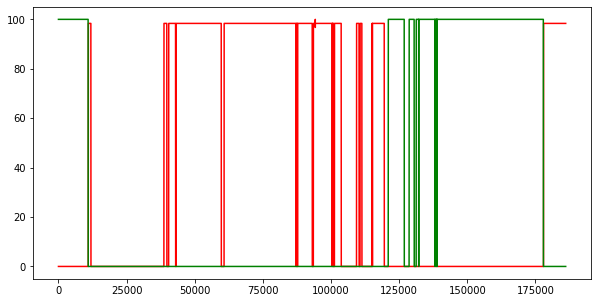

In [30]:
# plt.plot(dataframe_2[target_column], color = 'blue')
plt.plot(dataframe_4[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_4[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
# count_array = []
# for i,v in enumerate(rearranged_dataframe[target_column]):
#     if v==0:
#         count_array = np.append(count_array, i)

In [ ]:
# print(count_array.size)

In [ ]:
# if count_array.size > 0:
#     dataframe_1 = rearranged_dataframe.drop(count_array, axis=0)  # axis= 0 means row indiated. 1 means column indicated
# else:
#     dataframe_1 = rearranged_dataframe
    
# # dataframe_1 = dataframe_1.drop([blast_furnace_signal], axis=1)

In [ ]:
# # rearranged_dataframe[furnace_signal_column_a][1175119]
# # rearranged_dataframe.iloc[174180][furnace_signal_column_a]

# print(rearranged_dataframe.shape)
# print(dataframe_1.shape)

In [ ]:
# # print(initial_dataframe.shape)
# plt.plot(dataframe_1[target_column], color = 'blue')
# plt.plot(dataframe_1[furnace_signal_column_a], color = 'red')
# plt.plot(dataframe_1[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
if count_array_1.size > 0:
    dataframe_2 = rearranged_dataframe.drop(count_array_1, axis=0)  # axis= 0 means row indiated. 1 means column indicated
else:
    dataframe_2 = rearranged_dataframe

In [23]:
if count_array_2.size > 0:
    print('here')
    dataframe_3 = rearranged_dataframe.drop(count_array_2, axis=0)  # axis= 0 means row indiated. 1 means column indicated
else:
    print('no here')
    dataframe_3 = rearranged_dataframe

here


In [14]:
print(rearranged_dataframe.shape)
# print(dataframe_2.shape)
print(dataframe_3.shape)

(186100, 3983)
(141494, 3983)


In [18]:
here_count =0
for i,v in enumerate(dataframe_3[furnace_signal_column_a]):
    if dataframe_3.iloc[i][furnace_signal_column_a] ==0 and dataframe_3.iloc[i][furnace_signal_column_b]:
        print(i,'\t',v)
        here_count+=1
    else:
        pass
#         print('------------------------- i: 'i,'\t v: ',v,'\t blast B: ', rearranged_dataframe.iloc[i][furnace_signal_column_b])

8175 	 0.0
8176 	 0.0
8177 	 0.0
8178 	 0.0
8179 	 0.0
8180 	 0.0
8181 	 0.0
8182 	 0.0
8183 	 0.0
8184 	 0.0
8185 	 0.0
8186 	 0.0
8187 	 0.0
8188 	 0.0
8189 	 0.0
8190 	 0.0
8191 	 0.0
8192 	 0.0
8193 	 0.0
8194 	 0.0
8195 	 0.0
8196 	 0.0
8197 	 0.0
8198 	 0.0
8199 	 0.0
8200 	 0.0
8201 	 0.0
8202 	 0.0
8203 	 0.0
8204 	 0.0
8205 	 0.0
8206 	 0.0
8207 	 0.0
8208 	 0.0
8209 	 0.0
8210 	 0.0
8211 	 0.0
8212 	 0.0
8213 	 0.0
8214 	 0.0
8215 	 0.0
8216 	 0.0
8217 	 0.0
8218 	 0.0
8219 	 0.0
8220 	 0.0
8221 	 0.0
8222 	 0.0
8223 	 0.0
8224 	 0.0
8225 	 0.0
8226 	 0.0
8227 	 0.0
8228 	 0.0
8229 	 0.0
8230 	 0.0
8231 	 0.0
8232 	 0.0
8233 	 0.0
8234 	 0.0
8235 	 0.0
8236 	 0.0
8237 	 0.0
8238 	 0.0
8239 	 0.0
8240 	 0.0
8241 	 0.0
8242 	 0.0
8243 	 0.0
8244 	 0.0
8245 	 0.0
8246 	 0.0
8247 	 0.0
8248 	 0.0
8249 	 0.0
8250 	 0.0
8251 	 0.0
8252 	 0.0
8253 	 0.0
8254 	 0.0
8255 	 0.0
8256 	 0.0
8257 	 0.0
8258 	 0.0
8259 	 0.0
8260 	 0.0
8261 	 0.0
8262 	 0.0
8263 	 0.0
8264 	 0.0
8265 	 0.0

9016 	 0.0
9017 	 0.0
9018 	 0.0
9019 	 0.0
9020 	 0.0
9021 	 0.0
9022 	 0.0
9023 	 0.0
9024 	 0.0
9025 	 0.0
9026 	 0.0
9027 	 0.0
9028 	 0.0
9029 	 0.0
9030 	 0.0
9031 	 0.0
9032 	 0.0
9033 	 0.0
9034 	 0.0
9035 	 0.0
9036 	 0.0
9037 	 0.0
9038 	 0.0
9039 	 0.0
9040 	 0.0
9041 	 0.0
9042 	 0.0
9043 	 0.0
9044 	 0.0
9045 	 0.0
9046 	 0.0
9047 	 0.0
9048 	 0.0
9049 	 0.0
9050 	 0.0
9051 	 0.0
9052 	 0.0
9053 	 0.0
9054 	 0.0
9055 	 0.0
9056 	 0.0
9057 	 0.0
9058 	 0.0
9059 	 0.0
9060 	 0.0
9061 	 0.0
9062 	 0.0
9063 	 0.0
9064 	 0.0
9065 	 0.0
9066 	 0.0
9067 	 0.0
9068 	 0.0
9069 	 0.0
9070 	 0.0
9071 	 0.0
9072 	 0.0
9073 	 0.0
9074 	 0.0
9075 	 0.0
9076 	 0.0
9077 	 0.0
9078 	 0.0
9079 	 0.0
9080 	 0.0
9081 	 0.0
9082 	 0.0
9083 	 0.0
9084 	 0.0
9085 	 0.0
9086 	 0.0
9087 	 0.0
9088 	 0.0
9089 	 0.0
9090 	 0.0
9091 	 0.0
9092 	 0.0
9093 	 0.0
9094 	 0.0
9095 	 0.0
9096 	 0.0
9097 	 0.0
9098 	 0.0
9099 	 0.0
9100 	 0.0
9101 	 0.0
9102 	 0.0
9103 	 0.0
9104 	 0.0
9105 	 0.0
9106 	 0.0

9896 	 0.0
9897 	 0.0
9898 	 0.0
9899 	 0.0
9900 	 0.0
9901 	 0.0
9902 	 0.0
9903 	 0.0
9904 	 0.0
9905 	 0.0
9906 	 0.0
9907 	 0.0
9908 	 0.0
9909 	 0.0
9910 	 0.0
9911 	 0.0
9912 	 0.0
9913 	 0.0
9914 	 0.0
9915 	 0.0
9916 	 0.0
9917 	 0.0
9918 	 0.0
9919 	 0.0
9920 	 0.0
9921 	 0.0
9922 	 0.0
9923 	 0.0
9924 	 0.0
9925 	 0.0
9926 	 0.0
9927 	 0.0
9928 	 0.0
9929 	 0.0
9930 	 0.0
9931 	 0.0
9932 	 0.0
9933 	 0.0
9934 	 0.0
9935 	 0.0
9936 	 0.0
9937 	 0.0
9938 	 0.0
9939 	 0.0
9940 	 0.0
9941 	 0.0
9942 	 0.0
9943 	 0.0
9944 	 0.0
9945 	 0.0
9946 	 0.0
9947 	 0.0
9948 	 0.0
9949 	 0.0
9950 	 0.0
9951 	 0.0
9952 	 0.0
9953 	 0.0
9954 	 0.0
9955 	 0.0
9956 	 0.0
9957 	 0.0
9958 	 0.0
9959 	 0.0
9960 	 0.0
9961 	 0.0
9962 	 0.0
9963 	 0.0
9964 	 0.0
9965 	 0.0
9966 	 0.0
9967 	 0.0
9968 	 0.0
9969 	 0.0
9970 	 0.0
9971 	 0.0
9972 	 0.0
9973 	 0.0
9974 	 0.0
9975 	 0.0
9976 	 0.0
9977 	 0.0
9978 	 0.0
9979 	 0.0
9980 	 0.0
9981 	 0.0
9982 	 0.0
9983 	 0.0
9984 	 0.0
9985 	 0.0
9986 	 0.0

10621 	 0.0
10622 	 0.0
10623 	 0.0
10624 	 0.0
10625 	 0.0
10626 	 0.0
10627 	 0.0
10628 	 0.0
10629 	 0.0
10630 	 0.0
10631 	 0.0
10632 	 0.0
10633 	 0.0
10634 	 0.0
10635 	 0.0
10636 	 0.0
10637 	 0.0
10638 	 0.0
10639 	 0.0
10640 	 0.0
10641 	 0.0
10642 	 0.0
10643 	 0.0
10644 	 0.0
10645 	 0.0
10646 	 0.0
10647 	 0.0
10648 	 0.0
10649 	 0.0
10650 	 0.0
10651 	 0.0
10652 	 0.0
10653 	 0.0
10654 	 0.0
10655 	 0.0
10656 	 0.0
10657 	 0.0
10658 	 0.0
10659 	 0.0
10660 	 0.0
10661 	 0.0
10662 	 0.0
10663 	 0.0
10664 	 0.0
10665 	 0.0
10666 	 0.0
10667 	 0.0
10668 	 0.0
10669 	 0.0
10670 	 0.0
10671 	 0.0
10672 	 0.0
10673 	 0.0
10674 	 0.0
10675 	 0.0
10676 	 0.0
10677 	 0.0
10678 	 0.0
10679 	 0.0
10680 	 0.0
10681 	 0.0
10682 	 0.0
10683 	 0.0
10684 	 0.0
10685 	 0.0
10686 	 0.0
10687 	 0.0
10688 	 0.0
10689 	 0.0
10690 	 0.0
10691 	 0.0
10692 	 0.0
10693 	 0.0
10694 	 0.0
10695 	 0.0
10696 	 0.0
10697 	 0.0
10698 	 0.0
10699 	 0.0
10700 	 0.0
10701 	 0.0
10702 	 0.0
10703 	 0.0
1070

11409 	 0.0
11410 	 0.0
11411 	 0.0
11412 	 0.0
11413 	 0.0
11414 	 0.0
11415 	 0.0
11416 	 0.0
11417 	 0.0
11418 	 0.0
11419 	 0.0
11420 	 0.0
11421 	 0.0
11422 	 0.0
11423 	 0.0
11424 	 0.0
11425 	 0.0
11426 	 0.0
11427 	 0.0
11428 	 0.0
11429 	 0.0
11430 	 0.0
11431 	 0.0
11432 	 0.0
11433 	 0.0
11434 	 0.0
11435 	 0.0
11436 	 0.0
11437 	 0.0
11438 	 0.0
11439 	 0.0
11440 	 0.0
11441 	 0.0
11442 	 0.0
11443 	 0.0
11444 	 0.0
11445 	 0.0
11446 	 0.0
11447 	 0.0
11448 	 0.0
11449 	 0.0
11450 	 0.0
11451 	 0.0
11452 	 0.0
11453 	 0.0
11454 	 0.0
11455 	 0.0
11456 	 0.0
11457 	 0.0
11458 	 0.0
11459 	 0.0
11460 	 0.0
11461 	 0.0
11462 	 0.0
11463 	 0.0
11464 	 0.0
11465 	 0.0
11466 	 0.0
11467 	 0.0
11468 	 0.0
11469 	 0.0
11470 	 0.0
11471 	 0.0
11472 	 0.0
11473 	 0.0
11474 	 0.0
11475 	 0.0
11476 	 0.0
11477 	 0.0
11478 	 0.0
11479 	 0.0
11480 	 0.0
11481 	 0.0
11482 	 0.0
11483 	 0.0
11484 	 0.0
11485 	 0.0
11486 	 0.0
11487 	 0.0
11488 	 0.0
11489 	 0.0
11490 	 0.0
11491 	 0.0
1149

12284 	 0.0
12285 	 0.0
12286 	 0.0
12287 	 0.0
12288 	 0.0
12289 	 0.0
12290 	 0.0
12291 	 0.0
12292 	 0.0
12293 	 0.0
12294 	 0.0
12295 	 0.0
12296 	 0.0
12297 	 0.0
12298 	 0.0
12299 	 0.0
12300 	 0.0
12301 	 0.0
12302 	 0.0
12303 	 0.0
12304 	 0.0
12305 	 0.0
12306 	 0.0
12307 	 0.0
12308 	 0.0
12309 	 0.0
12310 	 0.0
12311 	 0.0
12312 	 0.0
12313 	 0.0
12314 	 0.0
12315 	 0.0
12316 	 0.0
12317 	 0.0
12318 	 0.0
12319 	 0.0
12320 	 0.0
12321 	 0.0
12322 	 0.0
12323 	 0.0
12324 	 0.0
12325 	 0.0
12326 	 0.0
12327 	 0.0
12328 	 0.0
12329 	 0.0
12330 	 0.0
12331 	 0.0
12332 	 0.0
12333 	 0.0
12334 	 0.0
12335 	 0.0
12336 	 0.0
12337 	 0.0
12338 	 0.0
12339 	 0.0
12340 	 0.0
12341 	 0.0
12342 	 0.0
12343 	 0.0
12344 	 0.0
12345 	 0.0
12346 	 0.0
12347 	 0.0
12348 	 0.0
12349 	 0.0
12350 	 0.0
12351 	 0.0
12352 	 0.0
12353 	 0.0
12354 	 0.0
12355 	 0.0
12356 	 0.0
12357 	 0.0
12358 	 0.0
12359 	 0.0
12360 	 0.0
12361 	 0.0
12362 	 0.0
12363 	 0.0
12364 	 0.0
12365 	 0.0
12366 	 0.0
1236

13045 	 0.0
13046 	 0.0
13047 	 0.0
13048 	 0.0
13049 	 0.0
13050 	 0.0
13051 	 0.0
13052 	 0.0
13053 	 0.0
13054 	 0.0
13055 	 0.0
13056 	 0.0
13057 	 0.0
13058 	 0.0
13059 	 0.0
13060 	 0.0
13061 	 0.0
13062 	 0.0
13063 	 0.0
13064 	 0.0
13065 	 0.0
13066 	 0.0
13067 	 0.0
13068 	 0.0
13069 	 0.0
13070 	 0.0
13071 	 0.0
13072 	 0.0
13073 	 0.0
13074 	 0.0
13075 	 0.0
13076 	 0.0
13077 	 0.0
13078 	 0.0
13079 	 0.0
13080 	 0.0
13081 	 0.0
13082 	 0.0
13083 	 0.0
13084 	 0.0
13085 	 0.0
13086 	 0.0
13087 	 0.0
13088 	 0.0
13089 	 0.0
13090 	 0.0
13091 	 0.0
13092 	 0.0
13093 	 0.0
13094 	 0.0
13095 	 0.0
13096 	 0.0
13097 	 0.0
13098 	 0.0
13099 	 0.0
13100 	 0.0
13101 	 0.0
13102 	 0.0
13103 	 0.0
13104 	 0.0
13105 	 0.0
13106 	 0.0
13107 	 0.0
13108 	 0.0
13109 	 0.0
13110 	 0.0
13111 	 0.0
13112 	 0.0
13113 	 0.0
13114 	 0.0
13115 	 0.0
13116 	 0.0
13117 	 0.0
13118 	 0.0
13119 	 0.0
13120 	 0.0
13121 	 0.0
13122 	 0.0
13123 	 0.0
13124 	 0.0
13125 	 0.0
13126 	 0.0
13127 	 0.0
1312

13903 	 0.0
13904 	 0.0
13905 	 0.0
13906 	 0.0
13907 	 0.0
13908 	 0.0
13909 	 0.0
13910 	 0.0
13911 	 0.0
13912 	 0.0
13913 	 0.0
13914 	 0.0
13915 	 0.0
13916 	 0.0
13917 	 0.0
13918 	 0.0
13919 	 0.0
13920 	 0.0
13921 	 0.0
13922 	 0.0
13923 	 0.0
13924 	 0.0
13925 	 0.0
13926 	 0.0
13927 	 0.0
13928 	 0.0
13929 	 0.0
13930 	 0.0
13931 	 0.0
13932 	 0.0
13933 	 0.0
13934 	 0.0
13935 	 0.0
13936 	 0.0
13937 	 0.0
13938 	 0.0
13939 	 0.0
13940 	 0.0
13941 	 0.0
13942 	 0.0
13943 	 0.0
13944 	 0.0
13945 	 0.0
13946 	 0.0
13947 	 0.0
13948 	 0.0
13949 	 0.0
13950 	 0.0
13951 	 0.0
13952 	 0.0
13953 	 0.0
13954 	 0.0
13955 	 0.0
13956 	 0.0
13957 	 0.0
13958 	 0.0
13959 	 0.0
13960 	 0.0
13961 	 0.0
13962 	 0.0
13963 	 0.0
13964 	 0.0
13965 	 0.0
13966 	 0.0
13967 	 0.0
13968 	 0.0
13969 	 0.0
13970 	 0.0
13971 	 0.0
13972 	 0.0
13973 	 0.0
13974 	 0.0
13975 	 0.0
13976 	 0.0
13977 	 0.0
13978 	 0.0
13979 	 0.0
13980 	 0.0
13981 	 0.0
13982 	 0.0
13983 	 0.0
13984 	 0.0
13985 	 0.0
1398

14670 	 0.0
14671 	 0.0
14672 	 0.0
14673 	 0.0
14674 	 0.0
14675 	 0.0
14676 	 0.0
14677 	 0.0
14678 	 0.0
14679 	 0.0
14680 	 0.0
14681 	 0.0
14682 	 0.0
14683 	 0.0
14684 	 0.0
14685 	 0.0
14686 	 0.0
14687 	 0.0
14688 	 0.0
14689 	 0.0
14690 	 0.0
14691 	 0.0
14692 	 0.0
14693 	 0.0
14694 	 0.0
14695 	 0.0
14696 	 0.0
14697 	 0.0
14698 	 0.0
14699 	 0.0
14700 	 0.0
14701 	 0.0
14702 	 0.0
14703 	 0.0
14704 	 0.0
14705 	 0.0
14706 	 0.0
14707 	 0.0
14708 	 0.0
14709 	 0.0
14710 	 0.0
14711 	 0.0
14712 	 0.0
14713 	 0.0
14714 	 0.0
14715 	 0.0
14716 	 0.0
14717 	 0.0
14718 	 0.0
14719 	 0.0
14720 	 0.0
14721 	 0.0
14722 	 0.0
14723 	 0.0
14724 	 0.0
14725 	 0.0
14726 	 0.0
14727 	 0.0
14728 	 0.0
14729 	 0.0
14730 	 0.0
14731 	 0.0
14732 	 0.0
14733 	 0.0
14734 	 0.0
14735 	 0.0
14736 	 0.0
14737 	 0.0
14738 	 0.0
14739 	 0.0
14740 	 0.0
14741 	 0.0
14742 	 0.0
14743 	 0.0
14744 	 0.0
14745 	 0.0
14746 	 0.0
14747 	 0.0
14748 	 0.0
14749 	 0.0
14750 	 0.0
14751 	 0.0
14752 	 0.0
1475

15395 	 0.0
15396 	 0.0
15397 	 0.0
15398 	 0.0
15399 	 0.0
15400 	 0.0
15401 	 0.0
15402 	 0.0
15403 	 0.0
15404 	 0.0
15405 	 0.0
15406 	 0.0
15407 	 0.0
15408 	 0.0
15409 	 0.0
15410 	 0.0
15411 	 0.0
15412 	 0.0
15413 	 0.0
15414 	 0.0
15415 	 0.0
15416 	 0.0
15417 	 0.0
15418 	 0.0
15419 	 0.0
15420 	 0.0
15421 	 0.0
15422 	 0.0
15423 	 0.0
15424 	 0.0
15425 	 0.0
15426 	 0.0
15427 	 0.0
15428 	 0.0
15429 	 0.0
15430 	 0.0
15431 	 0.0
15432 	 0.0
15433 	 0.0
15434 	 0.0
15435 	 0.0
15436 	 0.0
15437 	 0.0
15438 	 0.0
15439 	 0.0
15440 	 0.0
15441 	 0.0
15442 	 0.0
15443 	 0.0
15444 	 0.0
15445 	 0.0
15446 	 0.0
15447 	 0.0
15448 	 0.0
15449 	 0.0
15450 	 0.0
15451 	 0.0
15452 	 0.0
15453 	 0.0
15454 	 0.0
15455 	 0.0
15456 	 0.0
15457 	 0.0
15458 	 0.0
15459 	 0.0
15460 	 0.0
15461 	 0.0
15462 	 0.0
15463 	 0.0
15464 	 0.0
15465 	 0.0
15466 	 0.0
15467 	 0.0
15468 	 0.0
15469 	 0.0
15470 	 0.0
15471 	 0.0
15472 	 0.0
15473 	 0.0
15474 	 0.0
15475 	 0.0
15476 	 0.0
15477 	 0.0
1547

16120 	 0.0
16121 	 0.0
16122 	 0.0
16123 	 0.0
16124 	 0.0
16125 	 0.0
16126 	 0.0
16127 	 0.0
16128 	 0.0
16129 	 0.0
16130 	 0.0
16131 	 0.0
16132 	 0.0
16133 	 0.0
16134 	 0.0
16135 	 0.0
16136 	 0.0
16137 	 0.0
16138 	 0.0
16139 	 0.0
16140 	 0.0
16141 	 0.0
16142 	 0.0
16143 	 0.0
16144 	 0.0
16145 	 0.0
16146 	 0.0
16147 	 0.0
16148 	 0.0
16149 	 0.0
16150 	 0.0
16151 	 0.0
16152 	 0.0
16153 	 0.0
16154 	 0.0
16155 	 0.0
16156 	 0.0
16157 	 0.0
16158 	 0.0
16159 	 0.0
16160 	 0.0
16161 	 0.0
16162 	 0.0
16163 	 0.0
16164 	 0.0
16165 	 0.0
16166 	 0.0
16167 	 0.0
16168 	 0.0
16169 	 0.0
16170 	 0.0
16171 	 0.0
16172 	 0.0
16173 	 0.0
16174 	 0.0
16175 	 0.0
16176 	 0.0
16177 	 0.0
16178 	 0.0
16179 	 0.0
16180 	 0.0
16181 	 0.0
16182 	 0.0
16183 	 0.0
16184 	 0.0
16185 	 0.0
16186 	 0.0
16187 	 0.0
16188 	 0.0
16189 	 0.0
16190 	 0.0
16191 	 0.0
16192 	 0.0
16193 	 0.0
16194 	 0.0
16195 	 0.0
16196 	 0.0
16197 	 0.0
16198 	 0.0
16199 	 0.0
16200 	 0.0
16201 	 0.0
16202 	 0.0
1620

16844 	 0.0
16845 	 0.0
16846 	 0.0
16847 	 0.0
16848 	 0.0
16849 	 0.0
16850 	 0.0
16851 	 0.0
16852 	 0.0
16853 	 0.0
16854 	 0.0
16855 	 0.0
16856 	 0.0
16857 	 0.0
16858 	 0.0
16859 	 0.0
16860 	 0.0
16861 	 0.0
16862 	 0.0
16863 	 0.0
16864 	 0.0
16865 	 0.0
16866 	 0.0
16867 	 0.0
16868 	 0.0
16869 	 0.0
16870 	 0.0
16871 	 0.0
16872 	 0.0
16873 	 0.0
16874 	 0.0
16875 	 0.0
16876 	 0.0
16877 	 0.0
16878 	 0.0
16879 	 0.0
16880 	 0.0
16881 	 0.0
16882 	 0.0
16883 	 0.0
16884 	 0.0
16885 	 0.0
16886 	 0.0
16887 	 0.0
16888 	 0.0
16889 	 0.0
16890 	 0.0
16891 	 0.0
16892 	 0.0
16893 	 0.0
16894 	 0.0
16895 	 0.0
16896 	 0.0
16897 	 0.0
16898 	 0.0
16899 	 0.0
16900 	 0.0
16901 	 0.0
16902 	 0.0
16903 	 0.0
16904 	 0.0
16905 	 0.0
16906 	 0.0
16907 	 0.0
16908 	 0.0
16909 	 0.0
16910 	 0.0
16911 	 0.0
16912 	 0.0
16913 	 0.0
16914 	 0.0
16915 	 0.0
16916 	 0.0
16917 	 0.0
16918 	 0.0
16919 	 0.0
16920 	 0.0
16921 	 0.0
16922 	 0.0
16923 	 0.0
16924 	 0.0
16925 	 0.0
16926 	 0.0
1692

17646 	 0.0
17647 	 0.0
17648 	 0.0
17649 	 0.0
17650 	 0.0
17651 	 0.0
17652 	 0.0
17653 	 0.0
17654 	 0.0
17655 	 0.0
17656 	 0.0
17657 	 0.0
17658 	 0.0
17659 	 0.0
17660 	 0.0
17661 	 0.0
17662 	 0.0
17663 	 0.0
17664 	 0.0
17665 	 0.0
17666 	 0.0
17667 	 0.0
17668 	 0.0
17669 	 0.0
17670 	 0.0
17671 	 0.0
17672 	 0.0
17673 	 0.0
17674 	 0.0
17675 	 0.0
17676 	 0.0
17677 	 0.0
17678 	 0.0
17679 	 0.0
17680 	 0.0
17681 	 0.0
17682 	 0.0
17683 	 0.0
17684 	 0.0
17685 	 0.0
17686 	 0.0
17687 	 0.0
17688 	 0.0
17689 	 0.0
17690 	 0.0
17691 	 0.0
17692 	 0.0
17693 	 0.0
17694 	 0.0
17695 	 0.0
17696 	 0.0
17697 	 0.0
17698 	 0.0
17699 	 0.0
17700 	 0.0
17701 	 0.0
17702 	 0.0
17703 	 0.0
17704 	 0.0
17705 	 0.0
17706 	 0.0
17707 	 0.0
17708 	 0.0
17709 	 0.0
17710 	 0.0
17711 	 0.0
17712 	 0.0
17713 	 0.0
17714 	 0.0
17715 	 0.0
17716 	 0.0
17717 	 0.0
17718 	 0.0
17719 	 0.0
17720 	 0.0
17721 	 0.0
17722 	 0.0
17723 	 0.0
17724 	 0.0
17725 	 0.0
17726 	 0.0
17727 	 0.0
17728 	 0.0
1772

18448 	 0.0
18449 	 0.0
18450 	 0.0
18451 	 0.0
18452 	 0.0
18453 	 0.0
18454 	 0.0
18455 	 0.0
18456 	 0.0
18457 	 0.0
18458 	 0.0
18459 	 0.0
18460 	 0.0
18461 	 0.0
18462 	 0.0
18463 	 0.0
18464 	 0.0
18465 	 0.0
18466 	 0.0
18467 	 0.0
18468 	 0.0
18469 	 0.0
18470 	 0.0
18471 	 0.0
18472 	 0.0
18473 	 0.0
18474 	 0.0
18475 	 0.0
18476 	 0.0
18477 	 0.0
18478 	 0.0
18479 	 0.0
18480 	 0.0
18481 	 0.0
18482 	 0.0
18483 	 0.0
18484 	 0.0
18485 	 0.0
18486 	 0.0
18487 	 0.0
18488 	 0.0
18489 	 0.0
18490 	 0.0
18491 	 0.0
18492 	 0.0
18493 	 0.0
18494 	 0.0
18495 	 0.0
18496 	 0.0
18497 	 0.0
18498 	 0.0
18499 	 0.0
18500 	 0.0
18501 	 0.0
18502 	 0.0
18503 	 0.0
18504 	 0.0
18505 	 0.0
18506 	 0.0
18507 	 0.0
18508 	 0.0
18509 	 0.0
18510 	 0.0
18511 	 0.0
18512 	 0.0
18513 	 0.0
18514 	 0.0
18515 	 0.0
18516 	 0.0
18517 	 0.0
18518 	 0.0
18519 	 0.0
18520 	 0.0
18521 	 0.0
18522 	 0.0
18523 	 0.0
18524 	 0.0
18525 	 0.0
18526 	 0.0
18527 	 0.0
18528 	 0.0
18529 	 0.0
18530 	 0.0
1853

19315 	 0.0
19316 	 0.0
19317 	 0.0
19318 	 0.0
19319 	 0.0
19320 	 0.0
19321 	 0.0
19322 	 0.0
19323 	 0.0
19324 	 0.0
19325 	 0.0
19326 	 0.0
19327 	 0.0
19328 	 0.0
19329 	 0.0
19330 	 0.0
19331 	 0.0
19332 	 0.0
19333 	 0.0
19334 	 0.0
19335 	 0.0
19336 	 0.0
19337 	 0.0
19338 	 0.0
19339 	 0.0
19340 	 0.0
19341 	 0.0
19342 	 0.0
19343 	 0.0
19344 	 0.0
19345 	 0.0
19346 	 0.0
19347 	 0.0
19348 	 0.0
19349 	 0.0
19350 	 0.0
19351 	 0.0
19352 	 0.0
19353 	 0.0
19354 	 0.0
19355 	 0.0
19356 	 0.0
19357 	 0.0
19358 	 0.0
19359 	 0.0
19360 	 0.0
19361 	 0.0
19362 	 0.0
19363 	 0.0
19364 	 0.0
19365 	 0.0
19366 	 0.0
19367 	 0.0
19368 	 0.0
19369 	 0.0
19370 	 0.0
19371 	 0.0
19372 	 0.0
19373 	 0.0
19374 	 0.0
19375 	 0.0
19376 	 0.0
19377 	 0.0
19378 	 0.0
19379 	 0.0
19380 	 0.0
19381 	 0.0
19382 	 0.0
19383 	 0.0
19384 	 0.0
19385 	 0.0
19386 	 0.0
19387 	 0.0
19388 	 0.0
19389 	 0.0
19390 	 0.0
19391 	 0.0
19392 	 0.0
19393 	 0.0
19394 	 0.0
19395 	 0.0
19396 	 0.0
19397 	 0.0
1939

20041 	 0.0
20042 	 0.0
20043 	 0.0
20044 	 0.0
20045 	 0.0
20046 	 0.0
20047 	 0.0
20048 	 0.0
20049 	 0.0
20050 	 0.0
20051 	 0.0
20052 	 0.0
20053 	 0.0
20054 	 0.0
20055 	 0.0
20056 	 0.0
20057 	 0.0
20058 	 0.0
20059 	 0.0
20060 	 0.0
20061 	 0.0
20062 	 0.0
20063 	 0.0
20064 	 0.0
20065 	 0.0
20066 	 0.0
20067 	 0.0
20068 	 0.0
20069 	 0.0
20070 	 0.0
20071 	 0.0
20072 	 0.0
20073 	 0.0
20074 	 0.0
20075 	 0.0
20076 	 0.0
20077 	 0.0
20078 	 0.0
20079 	 0.0
20080 	 0.0
20081 	 0.0
20082 	 0.0
20083 	 0.0
20084 	 0.0
20085 	 0.0
20086 	 0.0
20087 	 0.0
20088 	 0.0
20089 	 0.0
20090 	 0.0
20091 	 0.0
20092 	 0.0
20093 	 0.0
20094 	 0.0
20095 	 0.0
20096 	 0.0
20097 	 0.0
20098 	 0.0
20099 	 0.0
20100 	 0.0
20101 	 0.0
20102 	 0.0
20103 	 0.0
20104 	 0.0
20105 	 0.0
20106 	 0.0
20107 	 0.0
20108 	 0.0
20109 	 0.0
20110 	 0.0
20111 	 0.0
20112 	 0.0
20113 	 0.0
20114 	 0.0
20115 	 0.0
20116 	 0.0
20117 	 0.0
20118 	 0.0
20119 	 0.0
20120 	 0.0
20121 	 0.0
20122 	 0.0
20123 	 0.0
2012

20958 	 0.0
20959 	 0.0
20960 	 0.0
20961 	 0.0
20962 	 0.0
20963 	 0.0
20964 	 0.0
20965 	 0.0
20966 	 0.0
20967 	 0.0
20968 	 0.0
20969 	 0.0
20970 	 0.0
20971 	 0.0
20972 	 0.0
20973 	 0.0
20974 	 0.0
20975 	 0.0
20976 	 0.0
20977 	 0.0
20978 	 0.0
20979 	 0.0
20980 	 0.0
20981 	 0.0
20982 	 0.0
20983 	 0.0
20984 	 0.0
20985 	 0.0
20986 	 0.0
20987 	 0.0
20988 	 0.0
20989 	 0.0
20990 	 0.0
20991 	 0.0
20992 	 0.0
20993 	 0.0
20994 	 0.0
20995 	 0.0
20996 	 0.0
20997 	 0.0
20998 	 0.0
20999 	 0.0
21000 	 0.0
21001 	 0.0
21002 	 0.0
21003 	 0.0
21004 	 0.0
21005 	 0.0
21006 	 0.0
21007 	 0.0
21008 	 0.0
21009 	 0.0
21010 	 0.0
21011 	 0.0
21012 	 0.0
21013 	 0.0
21014 	 0.0
21015 	 0.0
21016 	 0.0
21017 	 0.0
21018 	 0.0
21019 	 0.0
21020 	 0.0
21021 	 0.0
21022 	 0.0
21023 	 0.0
21024 	 0.0
21025 	 0.0
21026 	 0.0
21027 	 0.0
21028 	 0.0
21029 	 0.0
21030 	 0.0
21031 	 0.0
21032 	 0.0
21033 	 0.0
21034 	 0.0
21035 	 0.0
21036 	 0.0
21037 	 0.0
21038 	 0.0
21039 	 0.0
21040 	 0.0
2104

21673 	 0.0
21674 	 0.0
21675 	 0.0
21676 	 0.0
21677 	 0.0
21678 	 0.0
21679 	 0.0
21680 	 0.0
21681 	 0.0
21682 	 0.0
21683 	 0.0
21684 	 0.0
21685 	 0.0
21686 	 0.0
21687 	 0.0
21688 	 0.0
21689 	 0.0
21690 	 0.0
21691 	 0.0
21692 	 0.0
21693 	 0.0
21694 	 0.0
21695 	 0.0
21696 	 0.0
21697 	 0.0
21698 	 0.0
21699 	 0.0
21700 	 0.0
21701 	 0.0
21702 	 0.0
21703 	 0.0
21704 	 0.0
21705 	 0.0
21706 	 0.0
21707 	 0.0
21708 	 0.0
21709 	 0.0
21710 	 0.0
21711 	 0.0
21712 	 0.0
21713 	 0.0
21714 	 0.0
21715 	 0.0
21716 	 0.0
21717 	 0.0
21718 	 0.0
21719 	 0.0
21720 	 0.0
21721 	 0.0
21722 	 0.0
21723 	 0.0
21724 	 0.0
21725 	 0.0
21726 	 0.0
21727 	 0.0
21728 	 0.0
21729 	 0.0
21730 	 0.0
21731 	 0.0
21732 	 0.0
21733 	 0.0
21734 	 0.0
21735 	 0.0
21736 	 0.0
21737 	 0.0
21738 	 0.0
21739 	 0.0
21740 	 0.0
21741 	 0.0
21742 	 0.0
21743 	 0.0
21744 	 0.0
21745 	 0.0
21746 	 0.0
21747 	 0.0
21748 	 0.0
21749 	 0.0
21750 	 0.0
21751 	 0.0
21752 	 0.0
21753 	 0.0
21754 	 0.0
21755 	 0.0
2175

22377 	 0.0
22378 	 0.0
22379 	 0.0
22380 	 0.0
22381 	 0.0
22382 	 0.0
22383 	 0.0
22384 	 0.0
22385 	 0.0
22386 	 0.0
22387 	 0.0
22388 	 0.0
22389 	 0.0
22390 	 0.0
22391 	 0.0
22392 	 0.0
22393 	 0.0
22394 	 0.0
22395 	 0.0
22396 	 0.0
22397 	 0.0
22398 	 0.0
22399 	 0.0
22400 	 0.0
22401 	 0.0
22402 	 0.0
22403 	 0.0
22404 	 0.0
22405 	 0.0
22406 	 0.0
22407 	 0.0
22408 	 0.0
22409 	 0.0
22410 	 0.0
22411 	 0.0
22412 	 0.0
22413 	 0.0
22414 	 0.0
22415 	 0.0
22416 	 0.0
22417 	 0.0
22418 	 0.0
22419 	 0.0
22420 	 0.0
22421 	 0.0
22422 	 0.0
22423 	 0.0
22424 	 0.0
22425 	 0.0
22426 	 0.0
22427 	 0.0
22428 	 0.0
22429 	 0.0
22430 	 0.0
22431 	 0.0
22432 	 0.0
22433 	 0.0
22434 	 0.0
22435 	 0.0
22436 	 0.0
22437 	 0.0
22438 	 0.0
22439 	 0.0
22440 	 0.0
22441 	 0.0
22442 	 0.0
22443 	 0.0
22444 	 0.0
22445 	 0.0
22446 	 0.0
22447 	 0.0
22448 	 0.0
22449 	 0.0
22450 	 0.0
22451 	 0.0
22452 	 0.0
22453 	 0.0
22454 	 0.0
22455 	 0.0
22456 	 0.0
22457 	 0.0
22458 	 0.0
22459 	 0.0
2246

23206 	 0.0
23207 	 0.0
23208 	 0.0
23209 	 0.0
23210 	 0.0
23211 	 0.0
23212 	 0.0
23213 	 0.0
23214 	 0.0
23215 	 0.0
23216 	 0.0
23217 	 0.0
23218 	 0.0
23219 	 0.0
23220 	 0.0
23221 	 0.0
23222 	 0.0
23223 	 0.0
23224 	 0.0
23225 	 0.0
23226 	 0.0
23227 	 0.0
23228 	 0.0
23229 	 0.0
23230 	 0.0
23231 	 0.0
23232 	 0.0
23233 	 0.0
23234 	 0.0
23235 	 0.0
23236 	 0.0
23237 	 0.0
23238 	 0.0
23239 	 0.0
23240 	 0.0
23241 	 0.0
23242 	 0.0
23243 	 0.0
23244 	 0.0
23245 	 0.0
23246 	 0.0
23247 	 0.0
23248 	 0.0
23249 	 0.0
23250 	 0.0
23251 	 0.0
23252 	 0.0
23253 	 0.0
23254 	 0.0
23255 	 0.0
23256 	 0.0
23257 	 0.0
23258 	 0.0
23259 	 0.0
23260 	 0.0
23261 	 0.0
23262 	 0.0
23263 	 0.0
23264 	 0.0
23265 	 0.0
23266 	 0.0
23267 	 0.0
23268 	 0.0
23269 	 0.0
23270 	 0.0
23271 	 0.0
23272 	 0.0
23273 	 0.0
23274 	 0.0
23275 	 0.0
23276 	 0.0
23277 	 0.0
23278 	 0.0
23279 	 0.0
23280 	 0.0
23281 	 0.0
23282 	 0.0
23283 	 0.0
23284 	 0.0
23285 	 0.0
23286 	 0.0
23287 	 0.0
23288 	 0.0
2328

23957 	 0.0
23958 	 0.0
23959 	 0.0
23960 	 0.0
23961 	 0.0
23962 	 0.0
23963 	 0.0
23964 	 0.0
23965 	 0.0
23966 	 0.0
23967 	 0.0
23968 	 0.0
23969 	 0.0
23970 	 0.0
23971 	 0.0
23972 	 0.0
23973 	 0.0
23974 	 0.0
23975 	 0.0
23976 	 0.0
23977 	 0.0
23978 	 0.0
23979 	 0.0
23980 	 0.0
23981 	 0.0
23982 	 0.0
23983 	 0.0
23984 	 0.0
23985 	 0.0
23986 	 0.0
23987 	 0.0
23988 	 0.0
23989 	 0.0
23990 	 0.0
23991 	 0.0
23992 	 0.0
23993 	 0.0
23994 	 0.0
23995 	 0.0
23996 	 0.0
23997 	 0.0
23998 	 0.0
23999 	 0.0
24000 	 0.0
24001 	 0.0
24002 	 0.0
24003 	 0.0
24004 	 0.0
24005 	 0.0
24006 	 0.0
24007 	 0.0
24008 	 0.0
24009 	 0.0
24010 	 0.0
24011 	 0.0
24012 	 0.0
24013 	 0.0
24014 	 0.0
24015 	 0.0
24016 	 0.0
24017 	 0.0
24018 	 0.0
24019 	 0.0
24020 	 0.0
24021 	 0.0
24022 	 0.0
24023 	 0.0
24024 	 0.0
24025 	 0.0
24026 	 0.0
24027 	 0.0
24028 	 0.0
24029 	 0.0
24030 	 0.0
24031 	 0.0
24032 	 0.0
24033 	 0.0
24034 	 0.0
24035 	 0.0
24036 	 0.0
24037 	 0.0
24038 	 0.0
24039 	 0.0
2404

24777 	 0.0
24778 	 0.0
24779 	 0.0
24780 	 0.0
24781 	 0.0
24782 	 0.0
24783 	 0.0
24784 	 0.0
24785 	 0.0
24786 	 0.0
24787 	 0.0
24788 	 0.0
24789 	 0.0
24790 	 0.0
24791 	 0.0
24792 	 0.0
24793 	 0.0
24794 	 0.0
24795 	 0.0
24796 	 0.0
24797 	 0.0
24798 	 0.0
24799 	 0.0
24800 	 0.0
24801 	 0.0
24802 	 0.0
24803 	 0.0
24804 	 0.0
24805 	 0.0
24806 	 0.0
24807 	 0.0
24808 	 0.0
24809 	 0.0
24810 	 0.0
24811 	 0.0
24812 	 0.0
24813 	 0.0
24814 	 0.0
24815 	 0.0
24816 	 0.0
24817 	 0.0
24818 	 0.0
24819 	 0.0
24820 	 0.0
24821 	 0.0
24822 	 0.0
24823 	 0.0
24824 	 0.0
24825 	 0.0
24826 	 0.0
24827 	 0.0
24828 	 0.0
24829 	 0.0
24830 	 0.0
24831 	 0.0
24832 	 0.0
24833 	 0.0
24834 	 0.0
24835 	 0.0
24836 	 0.0
24837 	 0.0
24838 	 0.0
24839 	 0.0
24840 	 0.0
24841 	 0.0
24842 	 0.0
24843 	 0.0
24844 	 0.0
24845 	 0.0
24846 	 0.0
24847 	 0.0
24848 	 0.0
24849 	 0.0
24850 	 0.0
24851 	 0.0
24852 	 0.0
24853 	 0.0
24854 	 0.0
24855 	 0.0
24856 	 0.0
24857 	 0.0
24858 	 0.0
24859 	 0.0
2486

25644 	 0.0
25645 	 0.0
25646 	 0.0
25647 	 0.0
25648 	 0.0
25649 	 0.0
25650 	 0.0
25651 	 0.0
25652 	 0.0
25653 	 0.0
25654 	 0.0
25655 	 0.0
25656 	 0.0
25657 	 0.0
25658 	 0.0
25659 	 0.0
25660 	 0.0
25661 	 0.0
25662 	 0.0
25663 	 0.0
25664 	 0.0
25665 	 0.0
25666 	 0.0
25667 	 0.0
25668 	 0.0
25669 	 0.0
25670 	 0.0
25671 	 0.0
25672 	 0.0
25673 	 0.0
25674 	 0.0
25675 	 0.0
25676 	 0.0
25677 	 0.0
25678 	 0.0
25679 	 0.0
25680 	 0.0
25681 	 0.0
25682 	 0.0
25683 	 0.0
25684 	 0.0
25685 	 0.0
25686 	 0.0
25687 	 0.0
25688 	 0.0
25689 	 0.0
25690 	 0.0
25691 	 0.0
25692 	 0.0
25693 	 0.0
25694 	 0.0
25695 	 0.0
25696 	 0.0
25697 	 0.0
25698 	 0.0
25699 	 0.0
25700 	 0.0
25701 	 0.0
25702 	 0.0
25703 	 0.0
25704 	 0.0
25705 	 0.0
25706 	 0.0
25707 	 0.0
25708 	 0.0
25709 	 0.0
25710 	 0.0
25711 	 0.0
25712 	 0.0
25713 	 0.0
25714 	 0.0
25715 	 0.0
25716 	 0.0
25717 	 0.0
25718 	 0.0
25719 	 0.0
25720 	 0.0
25721 	 0.0
25722 	 0.0
25723 	 0.0
25724 	 0.0
25725 	 0.0
25726 	 0.0
2572

26330 	 0.0
26331 	 0.0
26332 	 0.0
26333 	 0.0
26334 	 0.0
26335 	 0.0
26336 	 0.0
26337 	 0.0
26338 	 0.0
26339 	 0.0
26340 	 0.0
26341 	 0.0
26342 	 0.0
26343 	 0.0
26344 	 0.0
26345 	 0.0
26346 	 0.0
26347 	 0.0
26348 	 0.0
26349 	 0.0
26350 	 0.0
26351 	 0.0
26352 	 0.0
26353 	 0.0
26354 	 0.0
26355 	 0.0
26356 	 0.0
26357 	 0.0
26358 	 0.0
26359 	 0.0
26360 	 0.0
26361 	 0.0
26362 	 0.0
26363 	 0.0
26364 	 0.0
26365 	 0.0
26366 	 0.0
26367 	 0.0
26368 	 0.0
26369 	 0.0
26370 	 0.0
26371 	 0.0
26372 	 0.0
26373 	 0.0
26374 	 0.0
26375 	 0.0
26376 	 0.0
26377 	 0.0
26378 	 0.0
26379 	 0.0
26380 	 0.0
26381 	 0.0
26382 	 0.0
26383 	 0.0
26384 	 0.0
26385 	 0.0
26386 	 0.0
26387 	 0.0
26388 	 0.0
26389 	 0.0
26390 	 0.0
26391 	 0.0
26392 	 0.0
26393 	 0.0
26394 	 0.0
26395 	 0.0
26396 	 0.0
26397 	 0.0
26398 	 0.0
26399 	 0.0
26400 	 0.0
26401 	 0.0
26402 	 0.0
26403 	 0.0
26404 	 0.0
26405 	 0.0
26406 	 0.0
26407 	 0.0
26408 	 0.0
26409 	 0.0
26410 	 0.0
26411 	 0.0
26412 	 0.0
2641

27855 	 0.0
27856 	 0.0
27857 	 0.0
27858 	 0.0
27859 	 0.0
27860 	 0.0
27861 	 0.0
27862 	 0.0
27863 	 0.0
27864 	 0.0
27865 	 0.0
27866 	 0.0
27867 	 0.0
27868 	 0.0
27869 	 0.0
27870 	 0.0
27871 	 0.0
27872 	 0.0
27873 	 0.0
27874 	 0.0
27875 	 0.0
27876 	 0.0
27877 	 0.0
27878 	 0.0
27879 	 0.0
27880 	 0.0
27881 	 0.0
27882 	 0.0
27883 	 0.0
27884 	 0.0
27885 	 0.0
27886 	 0.0
27887 	 0.0
27888 	 0.0
27889 	 0.0
27890 	 0.0
27891 	 0.0
27892 	 0.0
27893 	 0.0
27894 	 0.0
27895 	 0.0
27896 	 0.0
27897 	 0.0
27898 	 0.0
27899 	 0.0
27900 	 0.0
27901 	 0.0
27902 	 0.0
27903 	 0.0
27904 	 0.0
27905 	 0.0
27906 	 0.0
27907 	 0.0
27908 	 0.0
27909 	 0.0
27910 	 0.0
27911 	 0.0
27912 	 0.0
27913 	 0.0
27914 	 0.0
27915 	 0.0
27916 	 0.0
27917 	 0.0
27918 	 0.0
27919 	 0.0
27920 	 0.0
27921 	 0.0
27922 	 0.0
27923 	 0.0
27924 	 0.0
27925 	 0.0
27926 	 0.0
27927 	 0.0
27928 	 0.0
27929 	 0.0
27930 	 0.0
27931 	 0.0
27932 	 0.0
27933 	 0.0
27934 	 0.0
27935 	 0.0
27936 	 0.0
27937 	 0.0
2793

28613 	 0.0
28614 	 0.0
28615 	 0.0
28616 	 0.0
28617 	 0.0
28618 	 0.0
28619 	 0.0
28620 	 0.0
28621 	 0.0
28622 	 0.0
28623 	 0.0
28624 	 0.0
28625 	 0.0
28626 	 0.0
28627 	 0.0
28628 	 0.0
28629 	 0.0
28630 	 0.0
28631 	 0.0
28632 	 0.0
28633 	 0.0
28634 	 0.0
28635 	 0.0
28636 	 0.0
28637 	 0.0
28638 	 0.0
28639 	 0.0
28640 	 0.0
28641 	 0.0
28642 	 0.0
28643 	 0.0
28644 	 0.0
28645 	 0.0
28646 	 0.0
28647 	 0.0
28648 	 0.0
28649 	 0.0
28650 	 0.0
28651 	 0.0
28652 	 0.0
28653 	 0.0
28654 	 0.0
28655 	 0.0
28656 	 0.0
28657 	 0.0
28658 	 0.0
28659 	 0.0
28660 	 0.0
28661 	 0.0
28662 	 0.0
28663 	 0.0
28664 	 0.0
28665 	 0.0
28666 	 0.0
28667 	 0.0
28668 	 0.0
28669 	 0.0
28670 	 0.0
28671 	 0.0
28672 	 0.0
28673 	 0.0
28674 	 0.0
28675 	 0.0
28676 	 0.0
28677 	 0.0
28678 	 0.0
28679 	 0.0
28680 	 0.0
28681 	 0.0
28682 	 0.0
28683 	 0.0
28684 	 0.0
28685 	 0.0
28686 	 0.0
28687 	 0.0
28688 	 0.0
28689 	 0.0
28690 	 0.0
28691 	 0.0
28692 	 0.0
28693 	 0.0
28694 	 0.0
28695 	 0.0
2869

29364 	 0.0
29365 	 0.0
29366 	 0.0
29367 	 0.0
29368 	 0.0
29369 	 0.0
29370 	 0.0
29371 	 0.0
29372 	 0.0
29373 	 0.0
29374 	 0.0
29375 	 0.0
29376 	 0.0
29377 	 0.0
29378 	 0.0
29379 	 0.0
29380 	 0.0
29381 	 0.0
29382 	 0.0
29383 	 0.0
29384 	 0.0
29385 	 0.0
29386 	 0.0
29387 	 0.0
29388 	 0.0
29389 	 0.0
29390 	 0.0
29391 	 0.0
29392 	 0.0
29393 	 0.0
29394 	 0.0
29395 	 0.0
29396 	 0.0
29397 	 0.0
29398 	 0.0
29399 	 0.0
29400 	 0.0
29401 	 0.0
29402 	 0.0
29403 	 0.0
29404 	 0.0
29405 	 0.0
29406 	 0.0
29407 	 0.0
29408 	 0.0
29409 	 0.0
29410 	 0.0
29411 	 0.0
29412 	 0.0
29413 	 0.0
29414 	 0.0
29415 	 0.0
29416 	 0.0
29417 	 0.0
29418 	 0.0
29419 	 0.0
29420 	 0.0
29421 	 0.0
29422 	 0.0
29423 	 0.0
29424 	 0.0
29425 	 0.0
29426 	 0.0
29427 	 0.0
29428 	 0.0
29429 	 0.0
29430 	 0.0
29431 	 0.0
29432 	 0.0
29433 	 0.0
29434 	 0.0
29435 	 0.0
29436 	 0.0
29437 	 0.0
29438 	 0.0
29439 	 0.0
29440 	 0.0
29441 	 0.0
29442 	 0.0
29443 	 0.0
29444 	 0.0
29445 	 0.0
29446 	 0.0
2944

31919 	 0.0
31920 	 0.0
31921 	 0.0
31922 	 0.0
31923 	 0.0
31924 	 0.0
31925 	 0.0
31926 	 0.0
31927 	 0.0
31928 	 0.0
31929 	 0.0
31930 	 0.0
31931 	 0.0
31932 	 0.0
31933 	 0.0
31934 	 0.0
31935 	 0.0
31936 	 0.0
31937 	 0.0
31938 	 0.0
31939 	 0.0
31940 	 0.0
31941 	 0.0
31942 	 0.0
31943 	 0.0
31944 	 0.0
31945 	 0.0
31946 	 0.0
31947 	 0.0
31948 	 0.0
31949 	 0.0
31950 	 0.0
31951 	 0.0
31952 	 0.0
31953 	 0.0
31954 	 0.0
31955 	 0.0
31956 	 0.0
31957 	 0.0
31958 	 0.0
31959 	 0.0
31960 	 0.0
31961 	 0.0
31962 	 0.0
31963 	 0.0
31964 	 0.0
31965 	 0.0
31966 	 0.0
31967 	 0.0
31968 	 0.0
31969 	 0.0
31970 	 0.0
31971 	 0.0
31972 	 0.0
31973 	 0.0
31974 	 0.0
31975 	 0.0
31976 	 0.0
31977 	 0.0
31978 	 0.0
31979 	 0.0
31980 	 0.0
31981 	 0.0
31982 	 0.0
31983 	 0.0
31984 	 0.0
31985 	 0.0
31986 	 0.0
31987 	 0.0
31988 	 0.0
31989 	 0.0
31990 	 0.0
31991 	 0.0
31992 	 0.0
31993 	 0.0
31994 	 0.0
31995 	 0.0
31996 	 0.0
31997 	 0.0
31998 	 0.0
31999 	 0.0
32000 	 0.0
32001 	 0.0
3200

32633 	 0.0
32634 	 0.0
32635 	 0.0
32636 	 0.0
32637 	 0.0
32638 	 0.0
32639 	 0.0
32640 	 0.0
32641 	 0.0
32642 	 0.0
32643 	 0.0
32644 	 0.0
32645 	 0.0
32646 	 0.0
32647 	 0.0
32648 	 0.0
32649 	 0.0
32650 	 0.0
32651 	 0.0
32652 	 0.0
32653 	 0.0
32654 	 0.0
32655 	 0.0
32656 	 0.0
32657 	 0.0
32658 	 0.0
32659 	 0.0
32660 	 0.0
32661 	 0.0
32662 	 0.0
32663 	 0.0
32664 	 0.0
32665 	 0.0
32666 	 0.0
32667 	 0.0
32668 	 0.0
32669 	 0.0
32670 	 0.0
32671 	 0.0
32672 	 0.0
32673 	 0.0
32674 	 0.0
32675 	 0.0
32676 	 0.0
32677 	 0.0
32678 	 0.0
32679 	 0.0
32680 	 0.0
32681 	 0.0
32682 	 0.0
32683 	 0.0
32684 	 0.0
32685 	 0.0
32686 	 0.0
32687 	 0.0
32688 	 0.0
32689 	 0.0
32690 	 0.0
32691 	 0.0
32692 	 0.0
32693 	 0.0
32694 	 0.0
32695 	 0.0
32696 	 0.0
32697 	 0.0
32698 	 0.0
32699 	 0.0
32700 	 0.0
32701 	 0.0
32702 	 0.0
32703 	 0.0
32704 	 0.0
32705 	 0.0
32706 	 0.0
32707 	 0.0
32708 	 0.0
32709 	 0.0
32710 	 0.0
32711 	 0.0
32712 	 0.0
32713 	 0.0
32714 	 0.0
32715 	 0.0
3271

33356 	 0.0
33357 	 0.0
33358 	 0.0
33359 	 0.0
33360 	 0.0
33361 	 0.0
33362 	 0.0
33363 	 0.0
33364 	 0.0
33365 	 0.0
33366 	 0.0
33367 	 0.0
33368 	 0.0
33369 	 0.0
33370 	 0.0
33371 	 0.0
33372 	 0.0
33373 	 0.0
33374 	 0.0
33375 	 0.0
33376 	 0.0
33377 	 0.0
33378 	 0.0
33379 	 0.0
33380 	 0.0
33381 	 0.0
33382 	 0.0
33383 	 0.0
33384 	 0.0
33385 	 0.0
33386 	 0.0
33387 	 0.0
33388 	 0.0
33389 	 0.0
33390 	 0.0
33391 	 0.0
33392 	 0.0
33393 	 0.0
33394 	 0.0
33395 	 0.0
33396 	 0.0
33397 	 0.0
33398 	 0.0
33399 	 0.0
33400 	 0.0
33401 	 0.0
33402 	 0.0
33403 	 0.0
33404 	 0.0
33405 	 0.0
33406 	 0.0
33407 	 0.0
33408 	 0.0
33409 	 0.0
33410 	 0.0
33411 	 0.0
33412 	 0.0
33413 	 0.0
33414 	 0.0
33415 	 0.0
33416 	 0.0
33417 	 0.0
33418 	 0.0
33419 	 0.0
33420 	 0.0
33421 	 0.0
33422 	 0.0
33423 	 0.0
33424 	 0.0
33425 	 0.0
33426 	 0.0
33427 	 0.0
33428 	 0.0
33429 	 0.0
33430 	 0.0
33431 	 0.0
33432 	 0.0
33433 	 0.0
33434 	 0.0
33435 	 0.0
33436 	 0.0
33437 	 0.0
33438 	 0.0
3343

34093 	 0.0
34094 	 0.0
34095 	 0.0
34096 	 0.0
34097 	 0.0
34098 	 0.0
34099 	 0.0
34100 	 0.0
34101 	 0.0
34102 	 0.0
34103 	 0.0
34104 	 0.0
34105 	 0.0
34106 	 0.0
34107 	 0.0
34108 	 0.0
34109 	 0.0
34110 	 0.0
34111 	 0.0
34112 	 0.0
34113 	 0.0
34114 	 0.0
34115 	 0.0
34116 	 0.0
34117 	 0.0
34118 	 0.0
34119 	 0.0
34120 	 0.0
34121 	 0.0
34122 	 0.0
34123 	 0.0
34124 	 0.0
34125 	 0.0
34126 	 0.0
34127 	 0.0
34128 	 0.0
34129 	 0.0
34130 	 0.0
34131 	 0.0
34132 	 0.0
34133 	 0.0
34134 	 0.0
34135 	 0.0
34136 	 0.0
34137 	 0.0
34138 	 0.0
34139 	 0.0
34140 	 0.0
34141 	 0.0
34142 	 0.0
34143 	 0.0
34144 	 0.0
34145 	 0.0
34146 	 0.0
34147 	 0.0
34148 	 0.0
34149 	 0.0
34150 	 0.0
34151 	 0.0
34152 	 0.0
34153 	 0.0
34154 	 0.0
34155 	 0.0
34156 	 0.0
34157 	 0.0
34158 	 0.0
34159 	 0.0
34160 	 0.0
34161 	 0.0
34162 	 0.0
34163 	 0.0
34164 	 0.0
34165 	 0.0
34166 	 0.0
34167 	 0.0
34168 	 0.0
34169 	 0.0
34170 	 0.0
34171 	 0.0
34172 	 0.0
34173 	 0.0
34174 	 0.0
34175 	 0.0
3417

34945 	 0.0
34946 	 0.0
34947 	 0.0
34948 	 0.0
34949 	 0.0
34950 	 0.0
34951 	 0.0
34952 	 0.0
34953 	 0.0
34954 	 0.0
34955 	 0.0
34956 	 0.0
34957 	 0.0
34958 	 0.0
34959 	 0.0
34960 	 0.0
34961 	 0.0
34962 	 0.0
34963 	 0.0
34964 	 0.0
34965 	 0.0
34966 	 0.0
34967 	 0.0
34968 	 0.0
34969 	 0.0
34970 	 0.0
34971 	 0.0
34972 	 0.0
34973 	 0.0
34974 	 0.0
34975 	 0.0
34976 	 0.0
34977 	 0.0
34978 	 0.0
34979 	 0.0
34980 	 0.0
34981 	 0.0
34982 	 0.0
34983 	 0.0
34984 	 0.0
34985 	 0.0
34986 	 0.0
34987 	 0.0
34988 	 0.0
34989 	 0.0
34990 	 0.0
34991 	 0.0
34992 	 0.0
34993 	 0.0
34994 	 0.0
34995 	 0.0
34996 	 0.0
34997 	 0.0
34998 	 0.0
34999 	 0.0
35000 	 0.0
35001 	 0.0
35002 	 0.0
35003 	 0.0
35004 	 0.0
35005 	 0.0
35006 	 0.0
35007 	 0.0
35008 	 0.0
35009 	 0.0
35010 	 0.0
35011 	 0.0
35012 	 0.0
35013 	 0.0
35014 	 0.0
35015 	 0.0
35016 	 0.0
35017 	 0.0
35018 	 0.0
35019 	 0.0
35020 	 0.0
35021 	 0.0
35022 	 0.0
35023 	 0.0
35024 	 0.0
35025 	 0.0
35026 	 0.0
35027 	 0.0
3502

35670 	 0.0
35671 	 0.0
35672 	 0.0
35673 	 0.0
35674 	 0.0
35675 	 0.0
35676 	 0.0
35677 	 0.0
35678 	 0.0
35679 	 0.0
35680 	 0.0
35681 	 0.0
35682 	 0.0
35683 	 0.0
35684 	 0.0
35685 	 0.0
35686 	 0.0
35687 	 0.0
35688 	 0.0
35689 	 0.0
35690 	 0.0
35691 	 0.0
35692 	 0.0
35693 	 0.0
35694 	 0.0
35695 	 0.0
35696 	 0.0
35697 	 0.0
35698 	 0.0
35699 	 0.0
35700 	 0.0
35701 	 0.0
35702 	 0.0
35703 	 0.0
35704 	 0.0
35705 	 0.0
35706 	 0.0
35707 	 0.0
35708 	 0.0
35709 	 0.0
35710 	 0.0
35711 	 0.0
35712 	 0.0
35713 	 0.0
35714 	 0.0
35715 	 0.0
35716 	 0.0
35717 	 0.0
35718 	 0.0
35719 	 0.0
35720 	 0.0
35721 	 0.0
35722 	 0.0
35723 	 0.0
35724 	 0.0
35725 	 0.0
35726 	 0.0
35727 	 0.0
35728 	 0.0
35729 	 0.0
35730 	 0.0
35731 	 0.0
35732 	 0.0
35733 	 0.0
35734 	 0.0
35735 	 0.0
35736 	 0.0
35737 	 0.0
35738 	 0.0
35739 	 0.0
35740 	 0.0
35741 	 0.0
35742 	 0.0
35743 	 0.0
35744 	 0.0
35745 	 0.0
35746 	 0.0
35747 	 0.0
35748 	 0.0
35749 	 0.0
35750 	 0.0
35751 	 0.0
35752 	 0.0
3575

130711 	 0.0
130712 	 0.0
130713 	 0.0
130714 	 0.0
130715 	 0.0
130716 	 0.0
130717 	 0.0
130718 	 0.0
130719 	 0.0
130720 	 0.0
130721 	 0.0
130722 	 0.0
130723 	 0.0
130724 	 0.0
130725 	 0.0
130726 	 0.0
130727 	 0.0
130728 	 0.0
130729 	 0.0
130730 	 0.0
130731 	 0.0
130732 	 0.0
130733 	 0.0
130734 	 0.0
130735 	 0.0
130736 	 0.0
130737 	 0.0
130738 	 0.0
130739 	 0.0
130740 	 0.0
130741 	 0.0
130742 	 0.0
130743 	 0.0
130744 	 0.0
130745 	 0.0
130746 	 0.0
130747 	 0.0
130748 	 0.0
130749 	 0.0
130750 	 0.0
130751 	 0.0
130752 	 0.0
130753 	 0.0
130754 	 0.0
130755 	 0.0
130756 	 0.0
130757 	 0.0
130758 	 0.0
130759 	 0.0
130760 	 0.0
130761 	 0.0
130762 	 0.0
130763 	 0.0
130764 	 0.0
130765 	 0.0
130766 	 0.0
130767 	 0.0
130768 	 0.0
130769 	 0.0
130770 	 0.0
130771 	 0.0
130772 	 0.0
130773 	 0.0
130774 	 0.0
130775 	 0.0
130776 	 0.0
130777 	 0.0
130778 	 0.0
130779 	 0.0
130780 	 0.0
130781 	 0.0
130782 	 0.0
130783 	 0.0
130784 	 0.0
130785 	 0.0
130786 	 0.0
130787 	 0.0

131537 	 0.0
131538 	 0.0
131539 	 0.0
131540 	 0.0
131541 	 0.0
131542 	 0.0
131543 	 0.0
131544 	 0.0
131545 	 0.0
131546 	 0.0
131547 	 0.0
131548 	 0.0
131549 	 0.0
131550 	 0.0
131551 	 0.0
131552 	 0.0
131553 	 0.0
131554 	 0.0
131555 	 0.0
131556 	 0.0
131557 	 0.0
131558 	 0.0
131559 	 0.0
131560 	 0.0
131561 	 0.0
131562 	 0.0
131563 	 0.0
131564 	 0.0
131565 	 0.0
131566 	 0.0
131567 	 0.0
131568 	 0.0
131569 	 0.0
131570 	 0.0
131571 	 0.0
131572 	 0.0
131573 	 0.0
131574 	 0.0
131575 	 0.0
131576 	 0.0
131577 	 0.0
131578 	 0.0
131579 	 0.0
131580 	 0.0
131581 	 0.0
131582 	 0.0
131583 	 0.0
131584 	 0.0
131585 	 0.0
131586 	 0.0
131587 	 0.0
131588 	 0.0
131589 	 0.0
131590 	 0.0
131591 	 0.0
131592 	 0.0
131593 	 0.0
131594 	 0.0
131595 	 0.0
131596 	 0.0
131597 	 0.0
131598 	 0.0
131599 	 0.0
131600 	 0.0
131601 	 0.0
131602 	 0.0
131603 	 0.0
131604 	 0.0
131605 	 0.0
131606 	 0.0
131607 	 0.0
131608 	 0.0
131609 	 0.0
131610 	 0.0
131611 	 0.0
131612 	 0.0
131613 	 0.0

132262 	 0.0
132263 	 0.0
132264 	 0.0
132265 	 0.0
132266 	 0.0
132267 	 0.0
132268 	 0.0
132269 	 0.0
132270 	 0.0
132271 	 0.0
132272 	 0.0
132273 	 0.0
132274 	 0.0
132275 	 0.0
132276 	 0.0
132277 	 0.0
132278 	 0.0
132279 	 0.0
132280 	 0.0
132281 	 0.0
132282 	 0.0
132283 	 0.0
132284 	 0.0
132285 	 0.0
132286 	 0.0
132287 	 0.0
132288 	 0.0
132289 	 0.0
132290 	 0.0
132291 	 0.0
132292 	 0.0
132293 	 0.0
132294 	 0.0
132295 	 0.0
132296 	 0.0
132297 	 0.0
132298 	 0.0
132299 	 0.0
132300 	 0.0
132301 	 0.0
132302 	 0.0
132303 	 0.0
132304 	 0.0
132305 	 0.0
132306 	 0.0
132307 	 0.0
132308 	 0.0
132309 	 0.0
132310 	 0.0
132311 	 0.0
132312 	 0.0
132313 	 0.0
132314 	 0.0
132315 	 0.0
132316 	 0.0
132317 	 0.0
132318 	 0.0
132319 	 0.0
132320 	 0.0
132321 	 0.0
132322 	 0.0
132323 	 0.0
132324 	 0.0
132325 	 0.0
132326 	 0.0
132327 	 0.0
132328 	 0.0
132329 	 0.0
132330 	 0.0
132331 	 0.0
132332 	 0.0
132333 	 0.0
132334 	 0.0
132335 	 0.0
132336 	 0.0
132337 	 0.0
132338 	 0.0

132961 	 0.0
132962 	 0.0
132963 	 0.0
132964 	 0.0
132965 	 0.0
132966 	 0.0
132967 	 0.0
132968 	 0.0
132969 	 0.0
132970 	 0.0
132971 	 0.0
132972 	 0.0
132973 	 0.0
132974 	 0.0
132975 	 0.0
132976 	 0.0
132977 	 0.0
132978 	 0.0
132979 	 0.0
132980 	 0.0
132981 	 0.0
132982 	 0.0
132983 	 0.0
132984 	 0.0
132985 	 0.0
132986 	 0.0
132987 	 0.0
132988 	 0.0
132989 	 0.0
132990 	 0.0
132991 	 0.0
132992 	 0.0
132993 	 0.0
132994 	 0.0
132995 	 0.0
132996 	 0.0
132997 	 0.0
132998 	 0.0
132999 	 0.0
133000 	 0.0
133001 	 0.0
133002 	 0.0
133003 	 0.0
133004 	 0.0
133005 	 0.0
133006 	 0.0
133007 	 0.0
133008 	 0.0
133009 	 0.0
133010 	 0.0
133011 	 0.0
133012 	 0.0
133013 	 0.0
133014 	 0.0
133015 	 0.0
133016 	 0.0
133017 	 0.0
133018 	 0.0
133019 	 0.0
133020 	 0.0
133021 	 0.0
133022 	 0.0
133023 	 0.0
133024 	 0.0
133025 	 0.0
133026 	 0.0
133027 	 0.0
133028 	 0.0
133029 	 0.0
133030 	 0.0
133031 	 0.0
133032 	 0.0
133033 	 0.0
133034 	 0.0
133035 	 0.0
133036 	 0.0
133037 	 0.0

133662 	 0.0
133663 	 0.0
133664 	 0.0
133665 	 0.0
133666 	 0.0
133667 	 0.0
133668 	 0.0
133669 	 0.0
133670 	 0.0
133671 	 0.0
133672 	 0.0
133673 	 0.0
133674 	 0.0
133675 	 0.0
133676 	 0.0
133677 	 0.0
133678 	 0.0
133679 	 0.0
133680 	 0.0
133681 	 0.0
133682 	 0.0
133683 	 0.0
133684 	 0.0
133685 	 0.0
133686 	 0.0
133687 	 0.0
133688 	 0.0
133689 	 0.0
133690 	 0.0
133691 	 0.0
133692 	 0.0
133693 	 0.0
133694 	 0.0
133695 	 0.0
133696 	 0.0
133697 	 0.0
133698 	 0.0
133699 	 0.0
133700 	 0.0
133701 	 0.0
133702 	 0.0
133703 	 0.0
133704 	 0.0
133705 	 0.0
133706 	 0.0
133707 	 0.0
133708 	 0.0
133709 	 0.0
133710 	 0.0
133711 	 0.0
133712 	 0.0
133713 	 0.0
133714 	 0.0
133715 	 0.0
133716 	 0.0
133717 	 0.0
133718 	 0.0
133719 	 0.0
133720 	 0.0
133721 	 0.0
133722 	 0.0
133723 	 0.0
133724 	 0.0
133725 	 0.0
133726 	 0.0
133727 	 0.0
133728 	 0.0
133729 	 0.0
133730 	 0.0
133731 	 0.0
133732 	 0.0
133733 	 0.0
133734 	 0.0
133735 	 0.0
133736 	 0.0
133737 	 0.0
133738 	 0.0

134343 	 0.0
134344 	 0.0
134345 	 0.0
134346 	 0.0
134347 	 0.0
134348 	 0.0
134349 	 0.0
134350 	 0.0
134351 	 0.0
134352 	 0.0
134353 	 0.0
134354 	 0.0
134355 	 0.0
134356 	 0.0
134357 	 0.0
134358 	 0.0
134359 	 0.0
134360 	 0.0
134361 	 0.0
134362 	 0.0
134363 	 0.0
134364 	 0.0
134365 	 0.0
134366 	 0.0
134367 	 0.0
134368 	 0.0
134369 	 0.0
134370 	 0.0
134371 	 0.0
134372 	 0.0
134373 	 0.0
134374 	 0.0
134375 	 0.0
134376 	 0.0
134377 	 0.0
134378 	 0.0
134379 	 0.0
134380 	 0.0
134381 	 0.0
134382 	 0.0
134383 	 0.0
134384 	 0.0
134385 	 0.0
134386 	 0.0
134387 	 0.0
134388 	 0.0
134389 	 0.0
134390 	 0.0
134391 	 0.0
134392 	 0.0
134393 	 0.0
134394 	 0.0
134395 	 0.0
134396 	 0.0
134397 	 0.0
134398 	 0.0
134399 	 0.0
134400 	 0.0
134401 	 0.0
134402 	 0.0
134403 	 0.0
134404 	 0.0
134405 	 0.0
134406 	 0.0
134407 	 0.0
134408 	 0.0
134409 	 0.0
134410 	 0.0
134411 	 0.0
134412 	 0.0
134413 	 0.0
134414 	 0.0
134415 	 0.0
134416 	 0.0
134417 	 0.0
134418 	 0.0
134419 	 0.0

134989 	 0.0
134990 	 0.0
134991 	 0.0
134992 	 0.0
134993 	 0.0
134994 	 0.0
134995 	 0.0
134996 	 0.0
134997 	 0.0
134998 	 0.0
134999 	 0.0
135000 	 0.0
135001 	 0.0
135002 	 0.0
135003 	 0.0
135004 	 0.0
135005 	 0.0
135006 	 0.0
135007 	 0.0
135008 	 0.0
135009 	 0.0
135010 	 0.0
135011 	 0.0
135012 	 0.0
135013 	 0.0
135014 	 0.0
135015 	 0.0
135016 	 0.0
135017 	 0.0
135018 	 0.0
135019 	 0.0
135020 	 0.0
135021 	 0.0
135022 	 0.0
135023 	 0.0
135024 	 0.0
135025 	 0.0
135026 	 0.0
135027 	 0.0
135028 	 0.0
135029 	 0.0
135030 	 0.0
135031 	 0.0
135032 	 0.0
135033 	 0.0
135034 	 0.0
135035 	 0.0
135036 	 0.0
135037 	 0.0
135038 	 0.0
135039 	 0.0
135040 	 0.0
135041 	 0.0
135042 	 0.0
135043 	 0.0
135044 	 0.0
135045 	 0.0
135046 	 0.0
135047 	 0.0
135048 	 0.0
135049 	 0.0
135050 	 0.0
135051 	 0.0
135052 	 0.0
135053 	 0.0
135054 	 0.0
135055 	 0.0
135056 	 0.0
135057 	 0.0
135058 	 0.0
135059 	 0.0
135060 	 0.0
135061 	 0.0
135062 	 0.0
135063 	 0.0
135064 	 0.0
135065 	 0.0

135735 	 0.0
135736 	 0.0
135737 	 0.0
135738 	 0.0
135739 	 0.0
135740 	 0.0
135741 	 0.0
135742 	 0.0
135743 	 0.0
135744 	 0.0
135745 	 0.0
135746 	 0.0
135747 	 0.0
135748 	 0.0
135749 	 0.0
135750 	 0.0
135751 	 0.0
135752 	 0.0
135753 	 0.0
135754 	 0.0
135755 	 0.0
135756 	 0.0
135757 	 0.0
135758 	 0.0
135759 	 0.0
135760 	 0.0
135761 	 0.0
135762 	 0.0
135763 	 0.0
135764 	 0.0
135765 	 0.0
135766 	 0.0
135767 	 0.0
135768 	 0.0
135769 	 0.0
135770 	 0.0
135771 	 0.0
135772 	 0.0
135773 	 0.0
135774 	 0.0
135775 	 0.0
135776 	 0.0
135777 	 0.0
135778 	 0.0
135779 	 0.0
135780 	 0.0
135781 	 0.0
135782 	 0.0
135783 	 0.0
135784 	 0.0
135785 	 0.0
135786 	 0.0
135787 	 0.0
135788 	 0.0
135789 	 0.0
135790 	 0.0
135791 	 0.0
135792 	 0.0
135793 	 0.0
135794 	 0.0
135795 	 0.0
135796 	 0.0
135797 	 0.0
135798 	 0.0
135799 	 0.0
135800 	 0.0
135801 	 0.0
135802 	 0.0
135803 	 0.0
135804 	 0.0
135805 	 0.0
135806 	 0.0
135807 	 0.0
135808 	 0.0
135809 	 0.0
135810 	 0.0
135811 	 0.0

136477 	 0.0
136478 	 0.0
136479 	 0.0
136480 	 0.0
136481 	 0.0
136482 	 0.0
136483 	 0.0
136484 	 0.0
136485 	 0.0
136486 	 0.0
136487 	 0.0
136488 	 0.0
136489 	 0.0
136490 	 0.0
136491 	 0.0
136492 	 0.0
136493 	 0.0
136494 	 0.0
136495 	 0.0
136496 	 0.0
136497 	 0.0
136498 	 0.0
136499 	 0.0
136500 	 0.0
136501 	 0.0
136502 	 0.0
136503 	 0.0
136504 	 0.0
136505 	 0.0
136506 	 0.0
136507 	 0.0
136508 	 0.0
136509 	 0.0
136510 	 0.0
136511 	 0.0
136512 	 0.0
136513 	 0.0
136514 	 0.0
136515 	 0.0
136516 	 0.0
136517 	 0.0
136518 	 0.0
136519 	 0.0
136520 	 0.0
136521 	 0.0
136522 	 0.0
136523 	 0.0
136524 	 0.0
136525 	 0.0
136526 	 0.0
136527 	 0.0
136528 	 0.0
136529 	 0.0
136530 	 0.0
136531 	 0.0
136532 	 0.0
136533 	 0.0
136534 	 0.0
136535 	 0.0
136536 	 0.0
136537 	 0.0
136538 	 0.0
136539 	 0.0
136540 	 0.0
136541 	 0.0
136542 	 0.0
136543 	 0.0
136544 	 0.0
136545 	 0.0
136546 	 0.0
136547 	 0.0
136548 	 0.0
136549 	 0.0
136550 	 0.0
136551 	 0.0
136552 	 0.0
136553 	 0.0

137115 	 0.0
137116 	 0.0
137117 	 0.0
137118 	 0.0
137119 	 0.0
137120 	 0.0
137121 	 0.0
137122 	 0.0
137123 	 0.0
137124 	 0.0
137125 	 0.0
137126 	 0.0
137127 	 0.0
137128 	 0.0
137129 	 0.0
137130 	 0.0
137131 	 0.0
137132 	 0.0
137133 	 0.0
137134 	 0.0
137135 	 0.0
137136 	 0.0
137137 	 0.0
137138 	 0.0
137139 	 0.0
137140 	 0.0
137141 	 0.0
137142 	 0.0
137143 	 0.0
137144 	 0.0
137145 	 0.0
137146 	 0.0
137147 	 0.0
137148 	 0.0
137149 	 0.0
137150 	 0.0
137151 	 0.0
137152 	 0.0
137153 	 0.0
137154 	 0.0
137155 	 0.0
137156 	 0.0
137157 	 0.0
137158 	 0.0
137159 	 0.0
137160 	 0.0
137161 	 0.0
137162 	 0.0
137163 	 0.0
137164 	 0.0
137165 	 0.0
137166 	 0.0
137167 	 0.0
137168 	 0.0
137169 	 0.0
137170 	 0.0
137171 	 0.0
137172 	 0.0
137173 	 0.0
137174 	 0.0
137175 	 0.0
137176 	 0.0
137177 	 0.0
137178 	 0.0
137179 	 0.0
137180 	 0.0
137181 	 0.0
137182 	 0.0
137183 	 0.0
137184 	 0.0
137185 	 0.0
137186 	 0.0
137187 	 0.0
137188 	 0.0
137189 	 0.0
137190 	 0.0
137191 	 0.0

137759 	 0.0
137760 	 0.0
137761 	 0.0
137762 	 0.0
137763 	 0.0
137764 	 0.0
137765 	 0.0
137766 	 0.0
137767 	 0.0
137768 	 0.0
137769 	 0.0
137770 	 0.0
137771 	 0.0
137772 	 0.0
137773 	 0.0
137774 	 0.0
137775 	 0.0
137776 	 0.0
137777 	 0.0
137778 	 0.0
137779 	 0.0
137780 	 0.0
137781 	 0.0
137782 	 0.0
137783 	 0.0
137784 	 0.0
137785 	 0.0
137786 	 0.0
137787 	 0.0
137788 	 0.0
137789 	 0.0
137790 	 0.0
137791 	 0.0
137792 	 0.0
137793 	 0.0
137794 	 0.0
137795 	 0.0
137796 	 0.0
137797 	 0.0
137798 	 0.0
137799 	 0.0
137800 	 0.0
137801 	 0.0
137802 	 0.0
137803 	 0.0
137804 	 0.0
137805 	 0.0
137806 	 0.0
137807 	 0.0
137808 	 0.0
137809 	 0.0
137810 	 0.0
137811 	 0.0
137812 	 0.0
137813 	 0.0
137814 	 0.0
137815 	 0.0
137816 	 0.0
137817 	 0.0
137818 	 0.0
137819 	 0.0
137820 	 0.0
137821 	 0.0
137822 	 0.0
137823 	 0.0
137824 	 0.0
137825 	 0.0
137826 	 0.0
137827 	 0.0
137828 	 0.0
137829 	 0.0
137830 	 0.0
137831 	 0.0
137832 	 0.0
137833 	 0.0
137834 	 0.0
137835 	 0.0

138441 	 0.0
138442 	 0.0
138443 	 0.0
138444 	 0.0
138445 	 0.0
138446 	 0.0
138447 	 0.0
138448 	 0.0
138449 	 0.0
138450 	 0.0
138451 	 0.0
138452 	 0.0
138453 	 0.0
138454 	 0.0
138455 	 0.0
138456 	 0.0
138457 	 0.0
138458 	 0.0
138459 	 0.0
138460 	 0.0
138461 	 0.0
138462 	 0.0
138463 	 0.0
138464 	 0.0
138465 	 0.0
138466 	 0.0
138467 	 0.0
138468 	 0.0
138469 	 0.0
138470 	 0.0
138471 	 0.0
138472 	 0.0
138473 	 0.0
138474 	 0.0
138475 	 0.0
138476 	 0.0
138477 	 0.0
138478 	 0.0
138479 	 0.0
138480 	 0.0
138481 	 0.0
138482 	 0.0
138483 	 0.0
138484 	 0.0
138485 	 0.0
138486 	 0.0
138487 	 0.0
138488 	 0.0
138489 	 0.0
138490 	 0.0
138491 	 0.0
138492 	 0.0
138493 	 0.0
138494 	 0.0
138495 	 0.0
138496 	 0.0
138497 	 0.0
138498 	 0.0
138499 	 0.0
138500 	 0.0
138501 	 0.0
138502 	 0.0
138503 	 0.0
138504 	 0.0
138505 	 0.0
138506 	 0.0
138507 	 0.0
138508 	 0.0
138509 	 0.0
138510 	 0.0
138511 	 0.0
138512 	 0.0
138513 	 0.0
138514 	 0.0
138515 	 0.0
138516 	 0.0
138517 	 0.0

139186 	 0.0
139187 	 0.0
139188 	 0.0
139189 	 0.0
139190 	 0.0
139191 	 0.0
139192 	 0.0
139193 	 0.0
139194 	 0.0
139195 	 0.0
139196 	 0.0
139197 	 0.0
139198 	 0.0
139199 	 0.0
139200 	 0.0
139201 	 0.0
139202 	 0.0
139203 	 0.0
139204 	 0.0
139205 	 0.0
139206 	 0.0
139207 	 0.0
139208 	 0.0
139209 	 0.0
139210 	 0.0
139211 	 0.0
139212 	 0.0
139213 	 0.0
139214 	 0.0
139215 	 0.0
139216 	 0.0
139217 	 0.0
139218 	 0.0
139219 	 0.0
139220 	 0.0
139221 	 0.0
139222 	 0.0
139223 	 0.0
139224 	 0.0
139225 	 0.0
139226 	 0.0
139227 	 0.0
139228 	 0.0
139229 	 0.0
139230 	 0.0
139231 	 0.0
139232 	 0.0
139233 	 0.0
139234 	 0.0
139235 	 0.0
139236 	 0.0
139237 	 0.0
139238 	 0.0
139239 	 0.0
139240 	 0.0
139241 	 0.0
139242 	 0.0
139243 	 0.0
139244 	 0.0
139245 	 0.0
139246 	 0.0
139247 	 0.0
139248 	 0.0
139249 	 0.0
139250 	 0.0
139251 	 0.0
139252 	 0.0
139253 	 0.0
139254 	 0.0
139255 	 0.0
139256 	 0.0
139257 	 0.0
139258 	 0.0
139259 	 0.0
139260 	 0.0
139261 	 0.0
139262 	 0.0

139888 	 0.0
139889 	 0.0
139890 	 0.0
139891 	 0.0
139892 	 0.0
139893 	 0.0
139894 	 0.0
139895 	 0.0
139896 	 0.0
139897 	 0.0
139898 	 0.0
139899 	 0.0
139900 	 0.0
139901 	 0.0
139902 	 0.0
139903 	 0.0
139904 	 0.0
139905 	 0.0
139906 	 0.0
139907 	 0.0
139908 	 0.0
139909 	 0.0
139910 	 0.0
139911 	 0.0
139912 	 0.0
139913 	 0.0
139914 	 0.0
139915 	 0.0
139916 	 0.0
139917 	 0.0
139918 	 0.0
139919 	 0.0
139920 	 0.0
139921 	 0.0
139922 	 0.0
139923 	 0.0
139924 	 0.0
139925 	 0.0
139926 	 0.0
139927 	 0.0
139928 	 0.0
139929 	 0.0
139930 	 0.0
139931 	 0.0
139932 	 0.0
139933 	 0.0
139934 	 0.0
139935 	 0.0
139936 	 0.0
139937 	 0.0
139938 	 0.0
139939 	 0.0
139940 	 0.0
139941 	 0.0
139942 	 0.0
139943 	 0.0
139944 	 0.0
139945 	 0.0
139946 	 0.0
139947 	 0.0
139948 	 0.0
139949 	 0.0
139950 	 0.0
139951 	 0.0
139952 	 0.0
139953 	 0.0
139954 	 0.0
139955 	 0.0
139956 	 0.0
139957 	 0.0
139958 	 0.0
139959 	 0.0
139960 	 0.0
139961 	 0.0
139962 	 0.0
139963 	 0.0
139964 	 0.0

140571 	 0.0
140572 	 0.0
140573 	 0.0
140574 	 0.0
140575 	 0.0
140576 	 0.0
140577 	 0.0
140578 	 0.0
140579 	 0.0
140580 	 0.0
140581 	 0.0
140582 	 0.0
140583 	 0.0
140584 	 0.0
140585 	 0.0
140586 	 0.0
140587 	 0.0
140588 	 0.0
140589 	 0.0
140590 	 0.0
140591 	 0.0
140592 	 0.0
140593 	 0.0
140594 	 0.0
140595 	 0.0
140596 	 0.0
140597 	 0.0
140598 	 0.0
140599 	 0.0
140600 	 0.0
140601 	 0.0
140602 	 0.0
140603 	 0.0
140604 	 0.0
140605 	 0.0
140606 	 0.0
140607 	 0.0
140608 	 0.0
140609 	 0.0
140610 	 0.0
140611 	 0.0
140612 	 0.0
140613 	 0.0
140614 	 0.0
140615 	 0.0
140616 	 0.0
140617 	 0.0
140618 	 0.0
140619 	 0.0
140620 	 0.0
140621 	 0.0
140622 	 0.0
140623 	 0.0
140624 	 0.0
140625 	 0.0
140626 	 0.0
140627 	 0.0
140628 	 0.0
140629 	 0.0
140630 	 0.0
140631 	 0.0
140632 	 0.0
140633 	 0.0
140634 	 0.0
140635 	 0.0
140636 	 0.0
140637 	 0.0
140638 	 0.0
140639 	 0.0
140640 	 0.0
140641 	 0.0
140642 	 0.0
140643 	 0.0
140644 	 0.0
140645 	 0.0
140646 	 0.0
140647 	 0.0

141295 	 0.0
141296 	 0.0
141297 	 0.0
141298 	 0.0
141299 	 0.0
141300 	 0.0
141301 	 0.0
141302 	 0.0
141303 	 0.0
141304 	 0.0
141305 	 0.0
141306 	 0.0
141307 	 0.0
141308 	 0.0
141309 	 0.0
141310 	 0.0
141311 	 0.0
141312 	 0.0
141313 	 0.0
141314 	 0.0
141315 	 0.0
141316 	 0.0
141317 	 0.0
141318 	 0.0
141319 	 0.0
141320 	 0.0
141321 	 0.0
141322 	 0.0
141323 	 0.0
141324 	 0.0
141325 	 0.0
141326 	 0.0
141327 	 0.0
141328 	 0.0
141329 	 0.0
141330 	 0.0
141331 	 0.0
141332 	 0.0
141333 	 0.0
141334 	 0.0
141335 	 0.0
141336 	 0.0
141337 	 0.0
141338 	 0.0
141339 	 0.0
141340 	 0.0
141341 	 0.0
141342 	 0.0
141343 	 0.0
141344 	 0.0
141345 	 0.0
141346 	 0.0
141347 	 0.0
141348 	 0.0
141349 	 0.0
141350 	 0.0
141351 	 0.0
141352 	 0.0
141353 	 0.0
141354 	 0.0
141355 	 0.0
141356 	 0.0
141357 	 0.0
141358 	 0.0
141359 	 0.0
141360 	 0.0
141361 	 0.0
141362 	 0.0
141363 	 0.0
141364 	 0.0
141365 	 0.0
141366 	 0.0
141367 	 0.0
141368 	 0.0
141369 	 0.0
141370 	 0.0
141371 	 0.0

In [19]:
print(here_count)

36442


In [ ]:
# plt.plot(dataframe_2[target_column], color = 'blue')
plt.plot(dataframe_2[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_2[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

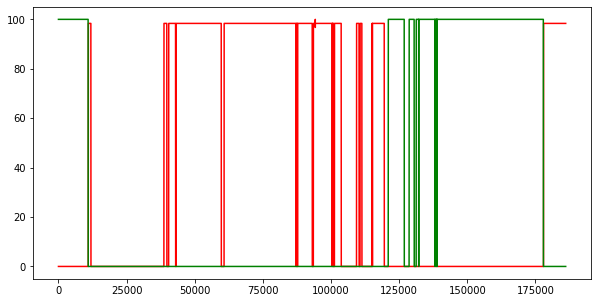

In [16]:
# plt.plot(dataframe_2[target_column], color = 'blue')
plt.plot(dataframe_3[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_3[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
for ind_t, val_t in enumerate(dataframe_3[furnace_signal_column_a]):
    if val_t==0 and dataframe_3.iloc[ind_t][furnace_signal_column_b]==0:
        print(ind_t)

In [ ]:
for a,b in enumerate(dataframe_2[furnace_signal_column_a]):
    if b >= 98 or dataframe_2.iloc[a][furnace_signal_column_b] >=100:
        print(a,'--------',b,'--------',dataframe_2.iloc[a][furnace_signal_column_b])
    else:
        print('---------------------------------------- a: ',a,'--------,b: ',b,'--------,c: ',dataframe_2.iloc[a][furnace_signal_column_b])

In [ ]:
# Checking signal for blast furnace B for turbine 9. If the value is 100 keep the ROW except drop
dataframe_no_zero_value_blast_furnace = drop_zero_value_row_of_blast_furnace_signal(rearranged_dataframe,furnace_signal_column)

In [ ]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)

In [ ]:
# # Checking target column's value. If ZERO drop the row.
# #target_signal = 'AEWIHO_T9AV2'
# # dataframe_reset = dataframe_no_zero_value_blast_furnace.reset_index()
# dataframe_no_zero_value_target_column = drop_zero_value_row_of_target_signal(dataframe_no_zero_value_blast_furnace, target_column)

In [ ]:
def remove_zero(data_frame,col_name,val):
    df = data_frame[(data_frame[[col_name]] != val).all(axis=1)]
    return df

dataframe_no_zero_value_target_column = remove_zero(dataframe_no_zero_value_blast_furnace, target_column,0)

In [ ]:
print(dataframe_no_zero_value_target_column.shape)

In [ ]:
# Drop the column which has sam evalue in every ROW
dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [ ]:

# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_drop_column_with_same_value)


In [ ]:
# Drop the row who has consecutive same value
dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [ ]:
# Drop the column who has 'objet' type value
dataframe_no_string = drop_string_column(dataframe_drop_row_consecutive_same_value)

In [ ]:
print(dataframe_drop_column_with_same_value.shape)
print(multivariate_data_drop_nan.shape)
print(dataframe_drop_row_consecutive_same_value.shape)
print(dataframe_no_string.shape)

In [ ]:
# Make dataframe with dateTime index
dataframe_datetime = dataframe_no_string.set_index('dateTime')


# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

# feature selection with Pearson Correlation.

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)


In [ ]:
dataframe_high_correlation.shape

In [ ]:
dataframe_datetime.tail()

In [ ]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(final_directory,' has already created')
    pass

In [ ]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [ ]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation[0:5000])

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

In [ ]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

In [ ]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
temp_frame = rearranged_dataframe.copy()
temp_frame_1 = temp_frame.set_index('dateTime')

In [ ]:
# df = dataframe_date_time_type(dataframe_datetime)
df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, furnace_signal_column,final_directory, subfolder_name = 'date_fig_blast_furnace')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, furnace_signal_column,final_directory, subfolder_name = 'week_fig_blast_furnace')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, furnace_signal_column,final_directory, subfolder_name = 'day_fig_blast_furnace')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

In [ ]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

In [ ]:
predicted_output = NN_model.predict(test_input)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

In [ ]:
plt.plot((min(test_output), max(test_output)), (min(predicted_output), max(predicted_output)), color='red')
plt.scatter(test_output, predicted_output, color='blue')

In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)